In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install librosa

In [4]:
import librosa
from librosa import display

In [5]:
% pylab inline
import os
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
import librosa
import os
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
from tqdm import tqdm
import pickle

import IPython.display
import librosa.display
ms.use('seaborn-muted')
%matplotlib inline

In [7]:
!pip install transformers

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [9]:
import pandas as pd
import math

labels_df = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/df_iemocap.csv')
iemocap_dir = '/content/drive/My Drive/IEMOCAP/No_Videos/IEMOCAP_full_release/'

In [10]:
local_emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'xxx': 8,
                'oth': 8}

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from IPython.display import display

%matplotlib inline

In [12]:
#df_audio_basic = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')

In [13]:
#df_audio_mfcc = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_mfcc_chroma_mel.csv')

In [14]:
#df_audio_complete = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features_complete.csv')

In [15]:
#df_text_train = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_train.csv')
#df_text_test = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_test.csv')
#df_text = pd.merge(df_text_train, df_text_test, on=['wav_file','label'])

In [16]:
#audiocode2text = pickle.load(open('/content/drive/My Drive/IEMOCAP/pre-processed/audiocode2text.pkl', 'rb'))

In [17]:
import unicodedata

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [18]:
#df_text_complete = pd.DataFrame()
#df_text_complete['wav_file'] = df_audio_complete['wav_file']
#df_text_complete['label'] = df_audio_complete['label']
#df_text_complete['transcription'] = [normalizeString(audiocode2text[code]) for code in df_audio_complete['wav_file']]

In [19]:
#df_text_complete.head()

In [20]:
#df_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/text_transcription_complete.csv', index=False)

In [21]:
#df_audio_text_complete = pd.merge(df_audio_complete, df_text_complete, on=['wav_file','label'])

In [22]:
#df_audio_text_complete.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
#df_audio_text_complete.head()

In [24]:
#df_audio_text_complete.to_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_complete.csv',index=False)

In [25]:
df_audio_text_complete_init_end = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_text_features_complete_init_end.csv')

In [26]:
df_audio_text_complete_init_end.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

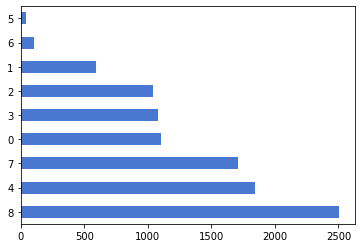

In [27]:
df_audio_text_complete_init_end['label'].value_counts().plot.barh()

In [28]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_subset = df_audio_text_complete_init_end[df_audio_text_complete_init_end['label'].isin([0, 1, 2, 3, 4, 5, 6, 7])]
print(df_audio_text_subset.shape)
display(df_audio_text_subset.head())

# change 7 to 2
df_audio_text_subset['label'] = df_audio_text_subset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5})
df_audio_text_subset.head()

(7523, 527)


,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,7,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.89

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,5,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,2,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
3,Ses01F_script02_1_F003,4,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.572989e-11,4.029952e-11,2.953777e-11,2.192073e-11,1.649043e-11,1.254962e-11,9.651495e-12,7.506788e-12,5.898416e-12,4.684184e-12,3.760937e-12,3.045121e-12,2.496552e-12,2.065624e-12,1.726792e-12,1.459347e-12,1.246079e-12,1.075874e-12,9.378994e-13,8.284760e-13,7.383294e-13,6.658642e-13,6.078275e-13,5.615233e-13,5.253156e-13,4.979084e-13,4.786450e-13,4.670081e-13,what flashlight ?
4,Ses01F_script02_1_F004,5,0.012753,0.004442,0.018505,0.008608,0.016044,0.005856,0.009171,0.006261,0.202532,0.455696,-0.003753,-0.001330,0.223784,0.417070,0.059571,0.083392,-464.95600,214.36331,-30.848808,20.951689,30.019796,-21.226885,7.795550,2.918576,-18.244328,0.655084,0.530733,-1.018557,1.864121,-7.877954,-0.544584,2.143899,-4.663166,5.289899,3.470439,-4.767123,-524.02893,210.10057,...,0.000030,0.000010,0.000002,7.594971e-07,1.892234e-07,1.946187e-08,8.178607e-10,5.304106e-11,3.702780e-11,3.263240e-11,2.89

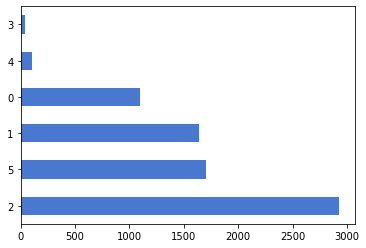

In [29]:
df_audio_text_subset['label'].value_counts().plot.barh()

In [30]:
#df_audio_com = pd.read_csv('/content/drive/My Drive/IEMOCAP/pre-processed/audio_features.csv')
df_audio_text_fullset = df_audio_text_complete_init_end.copy()
# print(df_audio_text_subset.shape)
# display(df_audio_text_subset.head())

# change 7 to 2
#df_audio_text_fullset['label'] = df_audio_text_fullset['label'].map({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6})
df_audio_text_fullset.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

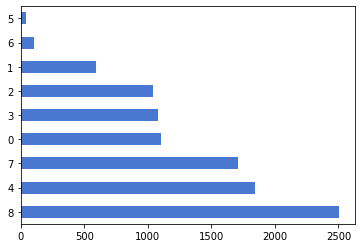

In [31]:
df_audio_text_fullset['label'].value_counts().plot.barh()

In [32]:
df_audio_text_fullset.columns[2:-1]

Index(['sig_mean_1', 'sig_mean_2', 'sig_std_1', 'sig_std_2', 'rmse_mean_1',
       'rmse_mean_2', 'rmse_std_1', 'rmse_std_2', 'silence_1', 'silence_2',
       ...
       'Var_171', 'Var_172', 'Var_173', 'Var_174', 'Var_175', 'Var_176',
       'Var_177', 'Var_178', 'Var_179', 'Var_180'],
      dtype='object', length=524)

In [33]:
#scalar = StandardScaler()
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])
df_audio_text_fullset.head()

,wav_file,label,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
0,Ses01F_script02_1_F000,7,0.005130,0.003345,0.008971,0.005600,0.006510,0.004552,0.006125,0.003223,0.202532,0.000000,-0.003753,0.012889,0.061267,0.088762,0.023284,0.025444,-500.49985,217.46428,-59.330510,19.593842,26.224344,-24.308723,17.884892,-0.751703,-16.189009,15.122288,-1.520144,-0.257516,15.567230,-3.697130,1.081093,6.438517,-5.752292,4.239439,2.470860,-6.904230,-503.48645,210.75563,...,0.000057,0.000025,0.000010,2.224810e-06,2.002306e-07,2.189421e-08,6.855616e-09,4.828816e-09,3.914872e-09,3.232662e-09,2.714578e-09,2.296672e-09,1.963625e-09,1.689569e-09,1.461196e-09,1.272259e-09,1.113364e-09,9.781190e-10,8.634290e-10,7.653368e-10,6.811383e-10,6.089603e-10,5.459491e-10,4.922035e-10,4.451362e-10,4.042162e-10,3.688932e-10,3.380295e-10,3.112135e-10,2.879629e-10,2.678751e-10,2.505023e-10,2.356052e-10,2.230641e-10,2.125512e-10,2.040865e-10,1.973927e-10,1.926087e-10,1.896746e-10,fine .
1,Ses01F_script02_1_F001,4,0.002561,0.001893,0.003389,0.002408,0.003228,0.002363,0.001019,0.000488,0.000000,0.000000,-0.003860,-0.003648,0.006765,0.006130,0.003228,0.006965,-556.85583,259.17313,-111.700910,41.251950,29.676125,-33.282536,44.780678,-6.783406,-27.661503,24.422330,-4.824197,2.060857,16.252928,-10.734018,5.388612,4.469379,-6.923003,12.556253,0.937509,-8.355969,-593.27640,250.90740,...,0.000018,0.000008,0.000003,6.750411e-07,7.681417e-08,8.082972e-09,5.998431e-10,3.260847e-11,1.858243e-11,1.551640e-11,1.319036e-11,1.132892e-11,9.845023e-12,8.614102e-12,7.574666e-12,6.702102e-12,5.956742e-12,5.310447e-12,4.752346e-12,4.265642e-12,3.842959e-12,3.474997e-12,3.148697e-12,2.865849e-12,2.615043e-12,2.394504e-12,2.202066e-12,2.031654e-12,1.882433e-12,1.751903e-12,1.637673e-12,1.538287e-12,1.452601e-12,1.380446e-12,1.319702e-12,1.270756e-12,1.231553e-12,1.203428e-12,1.185953e-12,breathing
2,Ses01F_script02_1_F002,8,0.027668,0.021205,0.053280,0.041874,0.034805,0.026953,0.040693,0.032355,0.544304,0.455696,-0.002581,0.017032,2.255951,3.703948,1.413973,2.087443,-412.19226,174.54459,-5.133279,-3.353046,6.836214,-15.049336,-1.557466,1.011068,-6.223684,-1.342451,-2.451266,4.171385,7.671523,-3.792080,0.189256,6.169927,-1.496285,-1.757042,-3.453769,-8.877199,-425.72513,179.27686,...,0.000133,0.000050,0.000026,3.380179e-06,7.534196e-07,3.104391e-07,2.294928e-07,2.058320e-07,1.844692e-07,1.647156e-07,1.475312e-07,1.318072e-07,1.180967e-07,1.058431e-07,9.487105e-08,8.526381e-08,7.675380e-08,6.915774e-08,6.245541e-08,5.651157e-08,5.123750e-08,4.658659e-08,4.241138e-08,3.877426e-08,3.551073e-08,3.261862e-08,3.008002e-08,2.782507e-08,2.583817e-08,2.409658e-08,2.256967e-08,2.124026e-08,2.008774e-08,1.910887e-08,1.828007e-08,1.761333e-08,1.708048e-08,1.669867e-08,1.646482e-08,what ?
3,Ses01F_script02_1_F003,6,0.011245,0.002951,0.020780,0.004100,0.014557,0.003684,0.014688,0.001818,0.430380,0.000000,-0.013330,0.005707,0.338363,0.410091,0.010547,0.018048,-424.35355,192.27371,-53.734577,11.386851,15.943404,-31.867428,13.349345,8.634661,-12.155327,9.869448,0.626148,-0.847787,9.283492,-6.525352,-2.335897,5.130168,-2.838742,5.973012,5.183867,-3.813650,-552.53800,229.59679,...,0.000070,0.000023,0.000006,2.052695e-06,3.547797e-07,2.791201e-08,1.259215e-09,2.521736e-10,1.642720e-10,1.122170e-10,7.848940e-11,5.5

In [34]:
X_audio_text=df_audio_text_fullset.drop(columns=['wav_file','label'])
y_audio_text=df_audio_text_fullset['label']

In [35]:
y_audio_text.head()

0    7
1    4
2    8
3    6
4    7
Name: label, dtype: int64

In [36]:
emotion_dict_new = {'ang': 0,
                'hap': 1,
                'exc': 2,
                'sad': 3,
                'fru': 4,
                'fea': 5,
                'sur': 6,
                'neu': 7,
                'oth': 8}

emo_keys_new = list(['ang', 'hap', 'exc', 'sad', 'fru', 'fea', 'sur', 'neu', 'oth'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict_new))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys_new)

In [37]:
X_train_val_split, X_test_split, y_train_val_split, y_test_split = train_test_split(X_audio_text,y_audio_text, test_size=0.20,random_state=100,stratify=y_audio_text)

In [38]:
X_train_val_split.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
6370,0.010179,0.021781,0.015698,0.036288,0.012652,0.028571,0.009202,0.022083,0.253165,0.316456,-0.006262,0.008930,0.171251,0.281522,0.966503,0.987453,-474.42560,198.10997,-30.193705,32.606358,44.172626,-14.275593,4.367509,-1.096562,-19.191200,-5.039648,-10.302511,-8.383627,2.191047,-6.457979,-4.840492,-1.311640,-2.267112,3.903175,-4.436537,-9.416252,-380.98685,192.89769,-65.862830,5.810804,...,0.000096,5.098890e-05,2.168933e-05,5.024440e-06,8.992040e-07,6.934956e-08,3.499822e-09,1.893690e-09,1.679379e-09,1.491291e-09,1.330031e-09,1.184472e-09,1.058626e-09,9.469744e-10,8.475897e-10,7.608876e-10,6.843455e-10,6.161998e-10,5.561862e-10,5.030248e-10,4.559092e-10,4.144397e-10,3.772096e-10,3.447832e-10,3.157501e-10,2.900104e-10,2.674372e-10,2.473835e-10,2.297160e-10,2.141981e-10,2.006507e-10,1.887991e-10,1.785425e-10,1.698433e-10,1.624926e-10,1.565407e-10,1.518145e-10,1.484179e-10,1.463413e-10,thanks . thanks a lot . you re really helping ...
2007,0.001244,0.006333,0.001698,0.009927,0.001573,0.008200,0.000664,0.005868,0.000000,0.316456,-0.014226,-0.007440,0.001770,0.001554,0.069114,0.094572,-629.22050,243.82004,-81.810100,21.243810,30.800932,-23.956282,26.393639,4.490540,-11.955177,10.975369,-9.985950,6.091014,22.037663,-4.014865,1.174137,3.878314,-3.197648,6.202764,-2.952164,-6.189026,-512.29000,189.08136,-48.524734,41.807114,...,0.000165,6.980269e-05,1.552167e-05,2.148013e-06,3.604811e-07,2.544110e-08,9.847557e-10,1.427163e-11,3.776691e-12,3.554143e-12,3.298152e-12,3.026143e-12,2.767998e-12,2.521487e-12,2.290587e-12,2.080820e-12,1.889510e-12,1.715145e-12,1.558458e-12,1.417103e-12,1.290438e-12,1.177430e-12,1.075264e-12,9.855199e-13,9.045391e-13,8.325442e-13,7.688875e-13,7.123545e-13,6.623363e-13,6.181883e-13,5.796398e-13,5.456917e-13,5.163053e-13,4.914278e-13,4.703595e-13,4.532730e-13,4.396816e-13,4.299403e-13,4.239692e-13,all right . customer service this is steve .
8560,0.010942,0.002131,0.016655,0.003168,0.013882,0.002642,0.009134,0.001768,0.139241,0.113924,-0.006017,-0.009940,0.190120,0.302884,0.006742,0.014700,-469.10820,195.46025,-17.023617,1.728229,0.921657,-33.669870,5.771768,13.348750,-10.340072,0.747486,3.808268,-1.665952,0.845986,-3.218029,-0.801006,-0.005322,-7.431807,-3.342011,-1.641532,-7.948358,-620.38970,226.52927,-28.152372,15.879581,...,0.000017,5.367258e-06,1.795690e-06,3.777189e-07,5.445870e-08,8.183581e-09,3.285802e-09,2.505662e-09,2.224008e-09,1.983585e-09,1.778128e-09,1.591497e-09,1.429141e-09,1.284132e-09,1.154117e-09,1.039991e-09,9.386563e-10,8.479802e-10,7.676669e-10,6.962123e-10,6.326329e-10,5.764125e-10,5.257810e-10,4.815551e-10,4.418163e-10,4.064890e-10,3.754219e-10,3.477705e-10,3.233333e-10,3.018497e-10,2.830440e-10,2.665711e-10,2.523030e-10,2.401855e-10,2.299432e-10,2.216469e-10,2.150420e-10,2.103022e-10,2.073956e-10,of course of course she will . . . of course s...
1768,0.001975,0.001890,0.002478,0.002395,0.002438,0.002366,0.000455,0.000376,0.000000,0.000000,0.003759,-0.009162,0.003343,0.010445,0.003176,0.008076,-606.10990,239.62117,-49.904160,28.489407,32.613697,-21.540464,24.892534,9.071917,-11.776072,16.337633,-0.549448,-2.231770,14.438574,-0.825773,2.112413,5.275187,-4.474143,6.512028,4.233131,-6.074260,-611.90110,245.42087,-53.0840

In [39]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_val_split,y_train_val_split, test_size=0.20,random_state=100,stratify=y_train_val_split)

In [40]:
X_train_split.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180,transcription
9618,0.009764,0.003983,0.016460,0.005821,0.012628,0.004968,0.010469,0.003124,0.265823,0.253165,-0.011481,-0.008149,0.200649,0.232073,0.022339,0.046530,-458.38535,194.54016,-67.078420,12.718695,28.026602,-25.485361,12.561518,1.495933,-18.719568,13.361668,6.095667,-4.341013,5.169956,-4.338484,-0.435947,8.304688,3.568121,6.064314,1.484608,-4.952909,-570.63950,189.48479,-32.932774,47.402855,...,0.000023,0.000010,0.000004,0.000001,2.242343e-07,2.101230e-08,8.585982e-10,1.338082e-10,1.091933e-10,9.714239e-11,8.692043e-11,7.766052e-11,6.962662e-11,6.245082e-11,5.602968e-11,5.039629e-11,4.541058e-11,4.095815e-11,3.701683e-11,3.351926e-11,3.041996e-11,2.767702e-11,2.521316e-11,2.306249e-11,2.113299e-11,1.942295e-11,1.792027e-11,1.658508e-11,1.540474e-11,1.436857e-11,1.346709e-11,1.267556e-11,1.198908e-11,1.140528e-11,1.091685e-11,1.051985e-11,1.020172e-11,9.974062e-12,9.836926e-12,there s actually a friend of mine is um moving...
6553,0.008061,0.011893,0.012711,0.016862,0.010280,0.014904,0.007379,0.007926,0.379747,0.151899,0.001277,-0.016574,0.113333,0.241034,0.181428,0.269447,-504.29974,201.19443,-55.174780,25.601122,23.217870,-29.615522,18.314909,1.441782,-18.747997,11.149949,-4.671633,-4.521016,12.250792,-7.463819,-3.816282,5.855108,-5.528978,0.707846,-0.747442,-11.470511,-447.80795,195.89394,-64.935990,29.458496,...,0.000076,0.000040,0.000022,0.000006,1.209766e-06,7.097424e-08,2.412718e-09,8.132645e-10,7.350352e-10,6.634124e-10,5.970128e-10,5.339568e-10,4.777632e-10,4.270675e-10,3.815744e-10,3.416166e-10,3.061887e-10,2.748267e-10,2.471476e-10,2.227421e-10,2.012115e-10,1.822636e-10,1.653549e-10,1.506632e-10,1.376096e-10,1.260081e-10,1.159189e-10,1.069849e-10,9.911494e-11,9.224387e-11,8.622964e-11,8.100416e-11,7.649116e-11,7.266927e-11,6.945569e-11,6.684843e-11,6.477198e-11,6.330163e-11,6.238333e-11,if i must laugh at everything i must laugh at ...
8658,0.013122,0.002841,0.019277,0.004474,0.016691,0.003575,0.009495,0.002655,0.126582,0.329114,-0.005063,-0.011262,0.246266,0.302118,0.014127,0.019750,-433.27200,200.39398,-61.700096,28.031680,37.005700,-37.922756,3.205591,7.697881,-21.561539,-1.153927,-1.900961,-5.060230,8.490916,-1.508047,-6.237298,-0.197917,-2.361201,-3.035257,-7.327430,-6.288318,-592.29560,211.01929,-42.510750,20.404177,...,0.000046,0.000025,0.000014,0.000002,4.749897e-07,5.376362e-08,1.518305e-09,2.300076e-10,7.439783e-11,2.315240e-11,6.312780e-12,1.391038e-12,5.225572e-13,8.638342e-13,1.422956e-12,1.890846e-12,2.197468e-12,2.354289e-12,2.398841e-12,2.363403e-12,2.278594e-12,2.162742e-12,2.030916e-12,1.897875e-12,1.764963e-12,1.636336e-12,1.519483e-12,1.406734e-12,1.306800e-12,1.220338e-12,1.143339e-12,1.074572e-12,1.011277e-12,9.584241e-13,9.155348e-13,8.795912e-13,8.509749e-13,8.316110e-13,8.190842e-13,let s let s just relax for a moment ma am . yo...
7744,0.004492,0.002555,0.007190,0.004043,0.005661,0.003166,0.004432,0.002483,0.443038,0.189873,0.001497,-0.007162,0.036873,0.119825,0.011587,0.025016,-583.56380,214.51021,-22.456505,22.453367,51.959194,-0.117076,1.553835,-0.654602,-11.493524,-0.644027,-6.276567,-5.998512,3.046884,-2.913117,1.555886,3.353651,-7.396857,-3.014944,-1.439843,-7.114805,-606.43680,215.57803,-24.127676,24.760054,...,0.000036,0.0

In [41]:
# scalar = StandardScaler()
# X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
# X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
# X_test_split[X_test_split.columns[:-1]] = scalar.fit_transform(X_test_split[X_test_split.columns[:-1]])
# #df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [42]:
#X_train_split.head()

In [43]:
X_train_val_split_rf = X_train_val_split.copy()
X_test_split_rf = X_test_split.copy()

In [44]:
scalar = StandardScaler()
X_train_val_split_rf[X_train_val_split_rf.columns[:-1]] = scalar.fit_transform(X_train_val_split_rf[X_train_val_split_rf.columns[:-1]])
X_test_split_rf[X_test_split_rf.columns[:-1]] = scalar.transform(X_test_split_rf[X_test_split_rf.columns[:-1]])

In [45]:
scalar = StandardScaler()
X_train_split[X_train_split.columns[:-1]] = scalar.fit_transform(X_train_split[X_train_split.columns[:-1]])
X_val_split[X_val_split.columns[:-1]] = scalar.transform(X_val_split[X_val_split.columns[:-1]])
X_test_split[X_test_split.columns[:-1]] = scalar.transform(X_test_split[X_test_split.columns[:-1]])
#df_audio_text_subset[df_audio_text_subset.columns[2:-1]] = scalar.fit_transform(df_audio_text_subset[df_audio_text_subset.columns[2:-1]])

In [46]:
#X_train_val_subset, X_test_subset, y_train_val_subset, y_test_subset = train_test_split(df_audio_text_subset,df_audio_text_subset['label'], test_size=0.20,random_state=100,stratify=df_audio_text_subset['label'])

In [47]:
df_audio_text_train_val_fullset_rf = df_audio_text_fullset[df_audio_text_fullset['wav_file'].str.contains('Ses01|Ses02|Ses03|Ses04')]
df_audio_text_train_fullset = df_audio_text_fullset[df_audio_text_fullset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
df_audio_text_val_fullset = df_audio_text_fullset[df_audio_text_fullset['wav_file'].str.contains('Ses04')]
df_audio_text_test_fullset = df_audio_text_fullset[df_audio_text_fullset['wav_file'].str.contains('Ses05')]
df_audio_text_test_fullset_rf = df_audio_text_test_fullset.copy()


In [48]:
#X_train_session_based = df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses01|Ses02|Ses03')]
X_train_session_based = df_audio_text_train_fullset.drop(columns=['wav_file','label'])
y_train_session_based = df_audio_text_train_fullset['label']
#X_train_session_based.drop(columns=['wav_file','label'],inplace=True)

In [49]:
X_test_session_based = df_audio_text_test_fullset.drop(columns=['wav_file','label'])
y_test_session_based = df_audio_text_test_fullset['label']
#X_test_session_based = X_test_subset.drop(columns=['wav_file','label'])
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses04')]
#y_test_session_based = y_test_subset.copy()
#X_test_session_based.drop(columns=['wav_file','label'],inplace=True)

In [50]:
X_val_session_based = df_audio_text_val_fullset.drop(columns=['wav_file','label'])
y_val_session_based = df_audio_text_val_fullset['label']
#X_val_session_based = X_train_val_subset[X_train_val_subset['wav_file'].str.contains('Ses05')]
#df_audio_text_subset[df_audio_text_subset['wav_file'].str.contains('Ses05')]
#y_val_session_based = X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)
#X_val_session_based['label']
#X_val_session_based.drop(columns=['wav_file','label'],inplace=True)

In [51]:
X_train_val_session_based_rf = df_audio_text_train_val_fullset_rf.drop(columns=['wav_file','label'])
y_train_val_session_based_rf = df_audio_text_train_val_fullset_rf['label']

In [52]:
X_test_session_based_rf = df_audio_text_test_fullset_rf.drop(columns=['wav_file','label'])
y_test_session_based_rf = df_audio_text_test_fullset_rf['label']

In [53]:
print(X_train_session_based.shape,X_val_session_based.shape,X_test_session_based.shape)

(5764, 525) (2103, 525) (2164, 525)


In [54]:
scalar = StandardScaler()
X_train_session_based[X_train_session_based.columns[:-1]] = scalar.fit_transform(X_train_session_based[X_train_session_based.columns[:-1]])
X_val_session_based[X_val_session_based.columns[:-1]] = scalar.transform(X_val_session_based[X_val_session_based.columns[:-1]])
X_test_session_based[X_test_session_based.columns[:-1]] = scalar.transform(X_test_session_based[X_test_session_based.columns[:-1]])

In [55]:
scalar = StandardScaler()
X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]] = scalar.fit_transform(X_train_val_session_based_rf[X_train_val_session_based_rf.columns[:-1]])
X_test_session_based_rf[X_test_session_based_rf.columns[:-1]] = scalar.transform(X_test_session_based_rf[X_test_session_based_rf.columns[:-1]])

In [56]:
X_test_session_based_rf.shape

(2164, 525)

In [57]:
import pandas as pd
import numpy as np
import pickle
import re

import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

# features = tfidf.fit_transform(df_text.transcription).toarray()

# labels = df_text.label
# print(features.shape)

In [59]:
output_dir = '/content/drive/My Drive/IEMOCAP/model_outputs'
if not os.path.exists(output_dir): ### If the file directory doesn't already exists,
    os.makedirs(output_dir) ### Make it please

Test Set Accuracy =  0.496
Test Set F-score =  0.299
Test Set Precision =  0.343
Test Set Recall =  0.292
Confusion matrix, without normalization
[[ 72  21 116   0   0  11]
 [ 15 121 148   0   0  43]
 [ 28  38 461   0   0  59]
 [  0   2   5   0   0   1]
 [  2   0  16   0   0   4]
 [  9  32 209   0   0  92]]


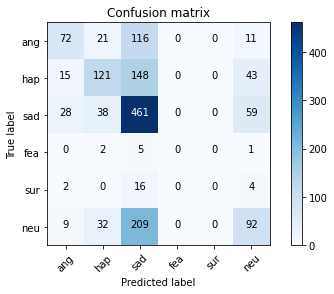

In [ ]:
# rf_classifier_split = RandomForestClassifier(n_estimators=600, min_samples_split=25)
# rf_classifier_split.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# # Predict
# pred_probs = rf_classifier_split.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# # Results
# display_results(y_test_split, pred_probs)

In [ ]:
#rf_classifier_split

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# kfolds = 4

# param_grid = {'n_estimators': [400, 500, 600], 'min_samples_split':[25, 35, 50],'max_depth':[2, 4, 6] , 'min_samples_leaf':[2, 5, 10] }

In [ ]:
# rf_classifier_split = RandomForestClassifier(max_features='sqrt',random_state=100)
# model_cv = GridSearchCV(estimator = rf_classifier_split, param_grid=param_grid, scoring='accuracy',cv=kfolds,verbose=1, return_train_score=True,n_jobs=-1)
# model_cv.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split )

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 55.4min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [ ]:
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,9.058625,0.047279,0.113379,0.008771,2,2,25,400,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.433223,0.435880,0.428191,0.420213,0.429377,0.005968,55,0.434301,0.432085,0.430882,0.434648,0.432979,0.001560
1,11.291824,0.047240,0.135206,0.003102,2,2,25,500,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.431229,0.434551,0.426862,0.420213,0.428214,0.005364,73,0.434301,0.430977,0.430660,0.433762,0.432425,0.001621
2,13.535233,0.035470,0.165181,0.005041,2,2,25,600,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.432558,0.435216,0.426862,0.419548,0.428546,0.006008,64,0.435409,0.431420,0.430882,0.433983,0.432924,0.001853
3,9.064383,0.076303,0.108878,0.011431,2,2,35,400,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.433223,0.435880,0.428191,0.420213,0.429377,0.005968,55,0.434301,0.432085,0.430882,0.434648,0.432979,0.001560
4,11.322069,0.067002,0.134058,0.013296,2,2,35,500,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.431229,0.434551,0.426862,0.420213,0.428214,0.005364,73,0.434301,0.430977,0.430660,0.433762,0.432425,0.001621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,28.221328,0.108726,0.156625,0.001511,6,10,35,500,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.469767,0.487708,0.481383,0.462101,0.475240,0.009947,6,0.592511,0.580988,0.587284,0.590607,0.587847,0.004380
77,33.904950,0.096848,0.186082,0.003200,6,10,35,600,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.472425,0.487708,0.480053,0.465426,0.476403,0.008328,1,0.591846,0.580324,0.587949,0.588613,0.587183,0.004226
78,22.436191,0.033514,0.127019,0.003922,6,10,50,400,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.465116,0.489037,0.480718,0.464096,0.474742,0.010560,10,0.586971,0.574341,0.576650,0.579087,0.579262,0.004757
79,28.093392,0.173889,0.157095,0.004580,6,10,50,500,"{'max_depth': 6, 'min_samples_leaf': 10, 'min_...",0.464452,0.489701,0.482048,0.464096,0.475074,0.011135,7,0.587636,0.572790,0.577315,0.581967,0.579927,0.005508


In [ ]:
# model_cv.best_score_, model_cv.best_estimator_,model_cv.best_params_

(0.476402903442426,
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=6, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=10, min_samples_split=35,
                        min_weight_fraction_leaf=0.0, n_estimators=600,
                        n_jobs=None, oob_score=False, random_state=100,
                        verbose=0, warm_start=False),
 {'max_depth': 6,
  'min_samples_leaf': 10,
  'min_samples_split': 35,
  'n_estimators': 600})

Test Set Accuracy =  0.338
Test Set F-score =  0.206
Test Set Precision =  0.259
Test Set Recall =  0.223
Confusion matrix, without normalization
[[ 81   0   1   2  61   0   0   5  70]
 [  8   0   1  18  22   0   0   7  63]
 [ 34   0   8   3  58   0   0  13  92]
 [  2   0   0 112   3   0   0   2  98]
 [ 31   0   2   9 129   0   0  20 179]
 [  0   0   0   0   1   0   0   2   5]
 [  2   0   0   3   0   0   0   1  15]
 [ 10   0   1  42  44   0   0  39 206]
 [ 38   0   3  57  74   0   0  20 310]]


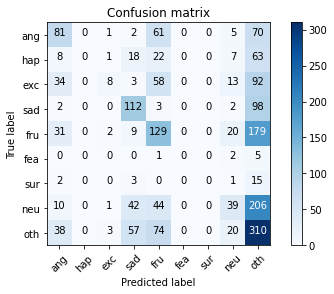

In [60]:
rf_classifier_split_final = RandomForestClassifier(max_features='sqrt',max_depth= 6,
  min_samples_leaf= 10,
  min_samples_split= 35,
  n_estimators = 600, random_state=100)
rf_classifier_split_final.fit(X_train_val_split_rf.drop(columns=['transcription']), y_train_val_split)

# Predict
pred_probs_rf_split = rf_classifier_split_final.predict_proba(X_test_split_rf.drop(columns=['transcription']))

# Results
display_results(y_test_split, pred_probs_rf_split)

Test Set Accuracy =  0.297
Test Set F-score =  0.181
Test Set Precision =  0.238
Test Set Recall =  0.199
Confusion matrix, without normalization
[[ 55   0   0   0  58   0   0   2  53]
 [  3   0   2  14  13   0   0  14  97]
 [ 16   0   2   0  66   0   0  17 198]
 [  3   0   0 108   8   0   0   1 125]
 [ 17   0   1   6 107   0   0   6 242]
 [  0   0   0   0   1   0   0   1   8]
 [  0   0   0   4   3   0   0   0  11]
 [  1   0   0  39  23   0   0  27 294]
 [ 13   0   1  69  64   0   0  27 344]]


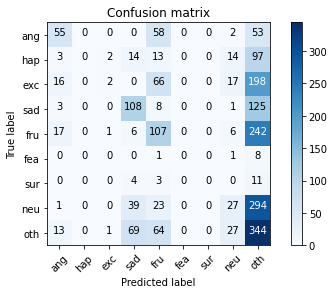

In [61]:
rf_classifier_session_based_rf = RandomForestClassifier(max_features='sqrt', max_depth= 6,
  min_samples_leaf= 10,
  min_samples_split= 35,
  n_estimators = 600, random_state=100 )
rf_classifier_session_based_rf.fit(X_train_val_session_based_rf.drop(columns=['transcription']), y_train_val_session_based_rf)

# Predict
pred_probs_sb_rf = rf_classifier_session_based_rf.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

# Results
display_results(y_test_session_based_rf, pred_probs_sb_rf)

In [62]:
from datetime import datetime

In [63]:
import joblib
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_rf_session_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model_rf_0.297_'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.joblib'
joblib.dump(rf_classifier_session_based_rf,local_filename)

['/content/drive/My Drive/IEMOCAP/model_outputs/model_rf_session_all_labels/model_rf_0.297_2021-10-2415_55_05.890440.joblib']

In [64]:
rf_test=joblib.load(local_filename)

Test Set Accuracy =  0.297
Test Set F-score =  0.181
Test Set Precision =  0.238
Test Set Recall =  0.199
Confusion matrix, without normalization
[[ 55   0   0   0  58   0   0   2  53]
 [  3   0   2  14  13   0   0  14  97]
 [ 16   0   2   0  66   0   0  17 198]
 [  3   0   0 108   8   0   0   1 125]
 [ 17   0   1   6 107   0   0   6 242]
 [  0   0   0   0   1   0   0   1   8]
 [  0   0   0   4   3   0   0   0  11]
 [  1   0   0  39  23   0   0  27 294]
 [ 13   0   1  69  64   0   0  27 344]]


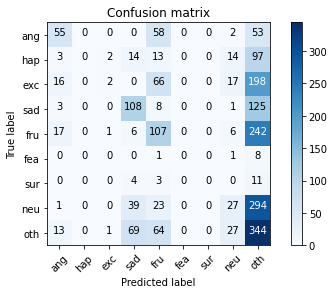

In [65]:
pred_rf_test = rf_test.predict_proba(X_test_session_based_rf.drop(columns=['transcription']))

# Results
display_results(y_test_session_based_rf, pred_rf_test)

In [66]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [67]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [68]:
X_train_split_cnn = X_train_split.drop(columns=['transcription'])
X_val_split_cnn = X_val_split.drop(columns=['transcription'])
X_test_split_cnn = X_test_split.drop(columns=['transcription'])

In [69]:
X_val_split_cnn.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
2523,-0.488347,-0.334006,-0.467542,-0.290294,-0.475787,-0.323928,-0.415553,-0.216573,0.932251,1.400558,0.009123,-0.010961,-0.200571,-0.200559,-0.143353,-0.151272,-0.470984,0.122658,-0.259686,0.526917,1.139227,0.657886,0.545637,0.025193,0.172748,0.606046,-0.416863,-0.551012,0.396783,-0.470947,-0.017095,0.754966,-0.540560,-0.052910,0.541978,-0.086333,-0.186871,-0.220007,0.744404,-0.709183,...,-0.118406,-0.107437,-0.100416,-0.077921,-0.059200,-0.048050,-0.046587,-0.046364,-0.058906,-0.107231,-0.106634,-0.106210,-0.105837,-0.105510,-0.105223,-0.104969,-0.104745,-0.104544,-0.104365,-0.104205,-0.104061,-0.103932,-0.103814,-0.103708,-0.103611,-0.103524,-0.103446,-0.103375,-0.103310,-0.103251,-0.103199,-0.103153,-0.103110,-0.103073,-0.103041,-0.103015,-0.102991,-0.102973,-0.102961,-0.102954
7892,-0.260216,0.167822,-0.308578,0.127876,-0.268906,0.157464,-0.326248,0.084971,-0.183260,-0.255230,0.008379,-0.023226,-0.189241,-0.191626,-0.096970,-0.059001,0.406376,-0.150210,-1.187745,0.043931,-0.219285,-1.301166,1.237305,2.561261,-1.660633,-0.156219,1.713249,0.542147,-0.598081,-1.807987,-1.141255,0.855106,-1.735232,-1.292675,2.174756,0.030090,0.684658,-0.784568,1.693584,-0.184754,...,-0.107061,-0.095486,-0.088725,-0.070111,-0.056225,-0.047539,-0.046531,-0.046358,-0.058881,-0.106998,-0.106398,-0.105968,-0.105588,-0.105254,-0.104958,-0.104697,-0.104464,-0.104256,-0.104069,-0.103902,-0.103751,-0.103615,-0.103491,-0.103378,-0.103276,-0.103183,-0.103099,-0.103024,-0.102955,-0.102892,-0.102835,-0.102786,-0.102740,-0.102700,-0.102666,-0.102637,-0.102612,-0.102592,-0.102579,-0.102571
5486,-0.071068,-0.018151,-0.019368,-0.075625,-0.082463,-0.032286,0.080364,-0.115316,0.541822,0.063191,-0.006949,-0.032624,-0.140847,-0.107197,-0.126789,-0.128703,0.613039,-2.187929,-0.240405,1.035002,1.911463,0.187307,-1.550629,-1.711787,0.133355,-0.418697,-0.943282,-1.238478,-1.251822,-0.825506,-0.454559,-0.807458,-0.435996,0.247016,0.439815,0.691008,0.304254,-0.974389,-0.197182,0.242966,...,-0.064535,-0.066555,-0.062794,-0.055633,-0.043800,-0.045054,-0.046312,-0.046338,-0.058696,-0.105223,-0.104634,-0.104217,-0.103852,-0.103532,-0.103252,-0.103005,-0.102787,-0.102593,-0.102420,-0.102266,-0.102127,-0.102003,-0.101891,-0.101789,-0.101697,-0.101614,-0.101539,-0.101472,-0.101410,-0.101354,-0.101305,-0.101262,-0.101221,-0.101186,-0.101156,-0.101131,-0.101109,-0.101092,-0.101080,-0.101074
9376,-0.102282,-0.303955,-0.194792,-0.345246,-0.089195,-0.310515,-0.352447,-0.384334,-0.796792,-0.701019,-0.023199,-0.011820,-0.178161,-0.174446,-0.149165,-0.149832,0.413213,0.615979,-0.353235,-0.107807,1.501754,0.192245,-0.258922,0.815098,-1.058330,-1.151984,0.205195,-0.463736,-0.893267,-0.448662,-1.039635,-0.727351,0.096038,0.003877,-0.351846,-1.017229,-0.167675,0.991700,0.328405,-0.806260,...,-0.117164,-0.105549,-0.097351,-0.076265,-0.058013,-0.047784,-0.046547,-0.046309,-0.056375,-0.082513,-0.081774,-0.081258,-0.080820,-0.080447,-0.080127,-0.079851,-0.079612,-0.079401,-0.079217,-0.079054,-0.078911,-0.078783,-0.078669,-0.078566,-0.078475,-0.078392,-0.078318,-0.078252,-0.078192,-0.078140,-0.078091,-0.078050,-0.078012,-0.077980,-0.077952,-0.077927,-0.077907,-0.077891,-0.077881,-0.077873
5462,-0.604714,-0.530631,-0.639406,-0.565113

In [70]:
X_train_split_cnn = X_train_split_cnn.values.reshape(X_train_split_cnn.shape[0],X_train_split_cnn.shape[1],1)
X_val_split_cnn = X_val_split_cnn.values.reshape(X_val_split_cnn.shape[0],X_val_split_cnn.shape[1],1)
X_test_split_cnn = X_test_split_cnn.values.reshape(X_test_split_cnn.shape[0],X_test_split_cnn.shape[1],1)

In [ ]:
### Try CNN Models

In [71]:
model_1d_split = Sequential()
model_1d_split.add(Conv1D(254,5,padding='same',input_shape=(X_train_split_cnn[0].shape))) # there are 8 features
model_1d_split.add(Activation('relu'))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Dropout(0.1))
model_1d_split.add(MaxPooling1D(pool_size=(8)))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Activation('relu'))
model_1d_split.add(Conv1D(128,5,padding='same'))
model_1d_split.add(Activation('relu'))
model_1d_split.add(Flatten())
model_1d_split.add(Dense(9))
model_1d_split.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [72]:
model_1d_split.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 524, 254)          1524      
_________________________________________________________________
activation (Activation)      (None, 524, 254)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 524, 128)          162688    
_________________________________________________________________
dropout (Dropout)            (None, 524, 128)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 65, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 65, 128)           82048     
_________________________________________________________________
activation_1 (Activation)    (None, 65, 128)           0

In [73]:
def plot_history(history_model):
    # summarize history for accuracy
    plt.plot(history_model.history['sparse_categorical_accuracy'])
    plt.plot(history_model.history['val_sparse_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('categorical accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history_model.history['loss'])
    plt.plot(history_model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [74]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [75]:
from datetime import datetime

In [76]:
output_dir

'/content/drive/My Drive/IEMOCAP/model_outputs'

In [77]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_1d_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename,
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [78]:
model_1d_split.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['sparse_categorical_accuracy'])

In [79]:
model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=32,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
201/201 [==============================] - 20s 13ms/step - loss: 1.8070 - sparse_categorical_accuracy: 0.2837 - val_loss: 1.7837 - val_sparse_categorical_accuracy: 0.3028
Epoch 2/30
201/201 [==============================] - 2s 11ms/step - loss: 1.7021 - sparse_categorical_accuracy: 0.3247 - val_loss: 1.7353 - val_sparse_categorical_accuracy: 0.3165
Epoch 3/30
201/201 [==============================] - 2s 11ms/step - loss: 1.6517 - sparse_categorical_accuracy: 0.3513 - val_loss: 1.7409 - val_sparse_categorical_accuracy: 0.3433

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
201/201 [==============================] - 2s 10ms/step - loss: 1.5621 - sparse_categorical_accuracy: 0.3982 - val_loss: 1.8347 - val_sparse_categorical_accuracy: 0.3421

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 5/30
201/201 [==============================] - 2s 11ms/step - loss: 1.5365 - sparse_categorical_accuracy

In [80]:
model_1d_split_hist.history

{'loss': [1.807042121887207,
  1.7021214962005615,
  1.6516790390014648,
  1.5621349811553955,
  1.5365169048309326],
 'lr': [0.001, 0.001, 0.001, 0.000100000005, 1.0000001e-05],
 'sparse_categorical_accuracy': [0.28368905186653137,
  0.32466116547584534,
  0.35130083560943604,
  0.3981928527355194,
  0.40660539269447327],
 'val_loss': [1.7837244272232056,
  1.7352793216705322,
  1.7409336566925049,
  1.8347421884536743,
  1.8479079008102417],
 'val_sparse_categorical_accuracy': [0.30280372500419617,
  0.3165109157562256,
  0.3433021903038025,
  0.3420560657978058,
  0.3401869237422943]}

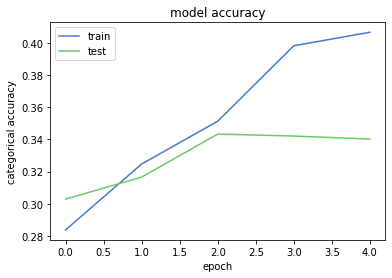

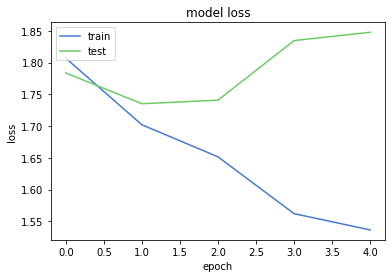

In [81]:
plot_history(model_1d_split_hist)

In [82]:
pred_y_1d_split = model_1d_split.predict(X_test_split_cnn)

In [83]:
pred_y_1d_split.shape

(2007, 9)

In [84]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [85]:
#pred_y_split.shape

In [86]:
#pred_y_split.shape

Test Set Accuracy =  0.349
Test Set F-score =  0.241
Test Set Precision =  0.245
Test Set Recall =  0.248
Confusion matrix, without normalization
[[ 83   0  10   4  45   0   0  11  67]
 [  6   0  15  21  18   0   0  13  46]
 [ 18   1  56   4  32   0   0  28  69]
 [  0   0   3 121   5   0   0   9  79]
 [ 33   1  28  17 102   0   0  43 146]
 [  0   0   1   0   2   0   0   3   2]
 [  2   0   1   7   1   0   0   3   7]
 [  8   0  13  52  40   0   0  88 141]
 [ 34   3  33  60  61   0   0  61 250]]


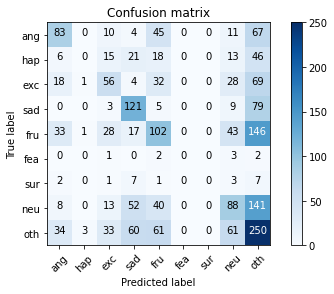

In [87]:
display_results(y_test_split, pred_y_1d_split)

In [88]:
#model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=64,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [89]:
#model_1d_split_hist = model_1d_split.fit(X_train_split_cnn, y_train_split, batch_size=16,epochs=30, validation_data=(X_val_split_cnn,y_val_split),callbacks=[model_checkpoint, early_stopping, reduce_lr])

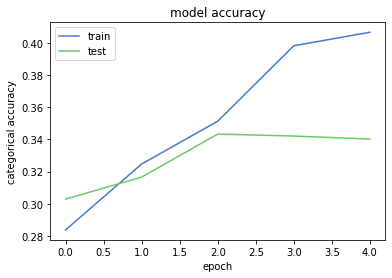

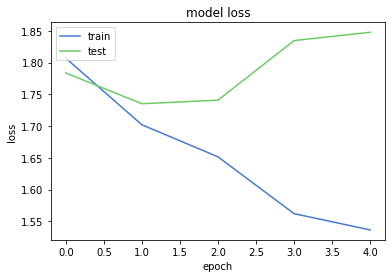

In [90]:
plot_history(model_1d_split_hist)

In [91]:
pred_y_1d_split = model_1d_split.predict(X_test_split_cnn)

In [92]:
pred_y_1d_split.shape

(2007, 9)

Test Set Accuracy =  0.349
Test Set F-score =  0.241
Test Set Precision =  0.245
Test Set Recall =  0.248
Confusion matrix, without normalization
[[ 83   0  10   4  45   0   0  11  67]
 [  6   0  15  21  18   0   0  13  46]
 [ 18   1  56   4  32   0   0  28  69]
 [  0   0   3 121   5   0   0   9  79]
 [ 33   1  28  17 102   0   0  43 146]
 [  0   0   1   0   2   0   0   3   2]
 [  2   0   1   7   1   0   0   3   7]
 [  8   0  13  52  40   0   0  88 141]
 [ 34   3  33  60  61   0   0  61 250]]


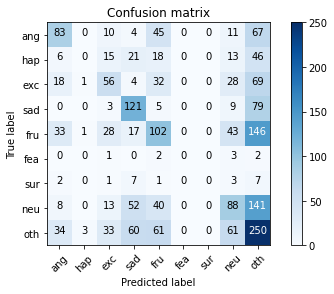

In [93]:
display_results(y_test_split, pred_y_1d_split)

In [94]:
#from sklearn.metrics import balanced_accuracy_score

In [95]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [96]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [97]:
from datetime import datetime

In [98]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_2d_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_') +'.h5'
#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [99]:
X_train_split_cnn_2d = np.expand_dims(X_train_split_cnn, -1)
X_val_split_cnn_2d = np.expand_dims(X_val_split_cnn, -1)
X_test_split_cnn_2d = np.expand_dims(X_test_split_cnn, -1)

In [100]:
X_train_split_cnn.shape

(6419, 524, 1)

In [101]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_split_2d = Sequential()
model_split_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_split_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_split_2d.add(Activation('relu'))
model_split_2d.add(Conv2D(128,5,padding='same'))
model_split_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_split_2d.add(Conv2D(128,5,padding='same'))
model_split_2d.add(Activation('relu'))
model_split_2d.add(Flatten())
model_split_2d.add(Dense(9))
model_split_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [102]:
model_split_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
              y_train_split,
              epochs=30,
              batch_size=32,
              validation_data=(X_val_split_cnn_2d, y_val_split),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
201/201 [==============================] - 8s 35ms/step - loss: 1.7818 - sparse_categorical_accuracy: 0.3027 - val_loss: 1.7202 - val_sparse_categorical_accuracy: 0.3321
Epoch 2/30
201/201 [==============================] - 7s 33ms/step - loss: 1.6506 - sparse_categorical_accuracy: 0.3544 - val_loss: 1.7502 - val_sparse_categorical_accuracy: 0.3308

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
201/201 [==============================] - 7s 33ms/step - loss: 1.5087 - sparse_categorical_accuracy: 0.4209 - val_loss: 1.7885 - val_sparse_categorical_accuracy: 0.3470

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
201/201 [==============================] - 7s 33ms/step - loss: 1.4654 - sparse_categorical_accuracy: 0.4415 - val_loss: 1.7809 - val_sparse_categorical_accuracy: 0.3477

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 00004: early stopping


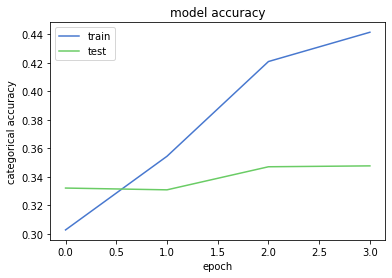

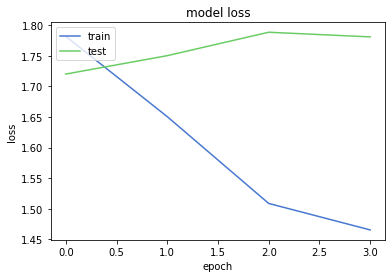

In [103]:
plot_history(model_history_split_2d)

In [104]:
pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.356
Test Set F-score =  0.264
Test Set Precision =  0.280
Test Set Recall =  0.266
Confusion matrix, without normalization
[[ 81   3  11   4  43   0   0  12  66]
 [  4  13  14  16  14   0   0  21  37]
 [ 18  10  54   3  20   0   0  33  70]
 [  1   0   3 134  10   0   0  16  53]
 [ 40   3  31  15 109   0   0  50 122]
 [  0   0   1   1   3   0   0   2   1]
 [  1   1   2   8   2   0   0   4   3]
 [  9   9  16  45  43   0   0 103 117]
 [ 41   3  33  58  70   0   0  76 221]]


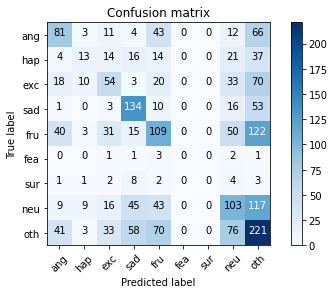

In [105]:
display_results(y_test_split, pred_y_2d_split)

In [106]:
# model_split_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
#               y_train_split,
#               epochs=30,
#               batch_size=64,
#               validation_data=(X_val_split_cnn_2d, y_val_split),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

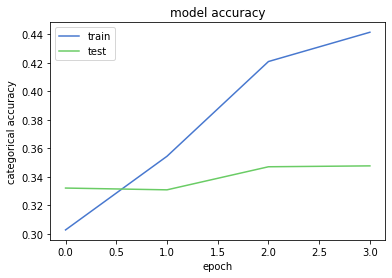

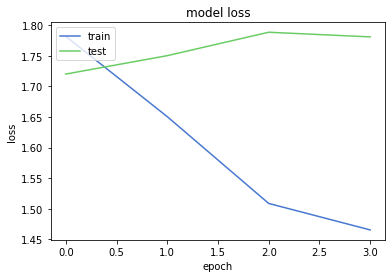

In [107]:
plot_history(model_history_split_2d)

In [108]:
pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.356
Test Set F-score =  0.264
Test Set Precision =  0.280
Test Set Recall =  0.266
Confusion matrix, without normalization
[[ 81   3  11   4  43   0   0  12  66]
 [  4  13  14  16  14   0   0  21  37]
 [ 18  10  54   3  20   0   0  33  70]
 [  1   0   3 134  10   0   0  16  53]
 [ 40   3  31  15 109   0   0  50 122]
 [  0   0   1   1   3   0   0   2   1]
 [  1   1   2   8   2   0   0   4   3]
 [  9   9  16  45  43   0   0 103 117]
 [ 41   3  33  58  70   0   0  76 221]]


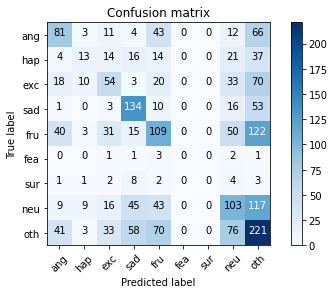

In [109]:
display_results(y_test_split, pred_y_2d_split)

In [110]:
# model_split_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_split_2d = model_split_2d.fit(X_train_split_cnn_2d, 
#               y_train_split,
#               epochs=30,
#               batch_size=16,
#               validation_data=(X_val_split_cnn_2d, y_val_split),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

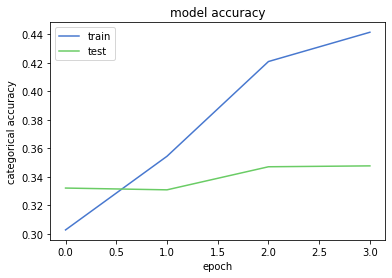

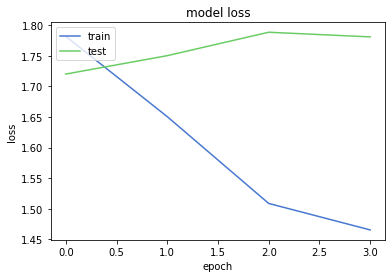

In [111]:
plot_history(model_history_split_2d)

In [112]:
pred_y_2d_split = model_split_2d.predict(X_test_split_cnn_2d)

Test Set Accuracy =  0.356
Test Set F-score =  0.264
Test Set Precision =  0.280
Test Set Recall =  0.266
Confusion matrix, without normalization
[[ 81   3  11   4  43   0   0  12  66]
 [  4  13  14  16  14   0   0  21  37]
 [ 18  10  54   3  20   0   0  33  70]
 [  1   0   3 134  10   0   0  16  53]
 [ 40   3  31  15 109   0   0  50 122]
 [  0   0   1   1   3   0   0   2   1]
 [  1   1   2   8   2   0   0   4   3]
 [  9   9  16  45  43   0   0 103 117]
 [ 41   3  33  58  70   0   0  76 221]]


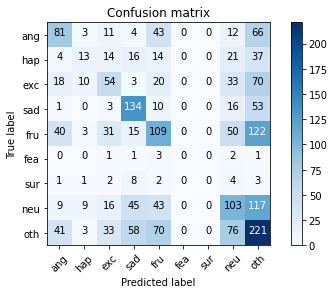

In [113]:
display_results(y_test_split, pred_y_2d_split)

In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [115]:
from transformers import BertTokenizer, TFBertModel, BertConfig, RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [116]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [117]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 126


In [118]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [119]:
MODEL_NAME = 'distilbert-base-uncased'

In [120]:
MAX_LENGTH = 126

tokenizer_dbert_split = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [121]:
X_train_dbert_split_text = tokenize(X_train_split['transcription'], tokenizer_dbert_split)
X_test_dbert_split_text = tokenize(X_test_split['transcription'], tokenizer_dbert_split)
X_val_dbert_split_text = tokenize(X_val_split['transcription'], tokenizer_dbert_split)

100%|██████████| 1605/1605 [00:00<00:00, 1936.86it/s]


In [122]:
config_db_split = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_split = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_db_split)

input_ids_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_db_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_db_split = DistilBERT_split(input_ids = input_ids_in_db_split, attention_mask = input_masks_in_db_split)[0]
X_db_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_db_split)
X_db_split = tf.keras.layers.GlobalMaxPool1D()(X_db_split)
X_db_split = tf.keras.layers.Dense(64, activation='relu')(X_db_split)
X_db_split = tf.keras.layers.Dropout(0.2)(X_db_split)
X_db_split = tf.keras.layers.Dense(9, activation='softmax')(X_db_split)

model_dbert_split = tf.keras.Model(inputs=[input_ids_in_db_split, input_masks_in_db_split], outputs = X_db_split)

for layer in model_dbert_split.layers[:3]:
    layer.trainable = False

model_dbert_split.summary()

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 126)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 126)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 126, 256)     918528      tf_distil_bert_model[0][13]  

In [123]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_dbert_split_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'
#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [124]:
y_val_split.shape

(1605,)

In [125]:
model_dbert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_split = model_dbert_split.fit(X_train_dbert_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_dbert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
201/201 [==============================] - 41s 148ms/step - loss: 1.8091 - sparse_categorical_accuracy: 0.3010 - val_loss: 1.6924 - val_sparse_categorical_accuracy: 0.3315
Epoch 2/30
201/201 [==============================] - 28s 137ms/step - loss: 1.6660 - sparse_categorical_accuracy: 0.3624 - val_loss: 1.6296 - val_sparse_categorical_accuracy: 0.3639
Epoch 3/30
201/201 [==============================] - 27s 137ms/step - loss: 1.5655 - sparse_categorical_accuracy: 0.4072 - val_loss: 1.6017 - val_sparse_categorical_accuracy: 0.3763
Epoch 4/30
201/201 [==============================] - 28s 138ms/step - loss: 1.4937 - sparse_categorical_accuracy: 0.4281 - val_loss: 1.5518 - val_sparse_categorical_accuracy: 0.3919
Epoch 5/30
201/201 [==============================] - 27s 137ms/step - loss: 1.4302 - sparse_categorical_accuracy: 0.4487 - val_loss: 1.5255 - val_sparse_categorical_accuracy: 0.4106
Epoch 6/30
201/201 [==============================] - 27s 136ms/step - loss: 1.3470 -

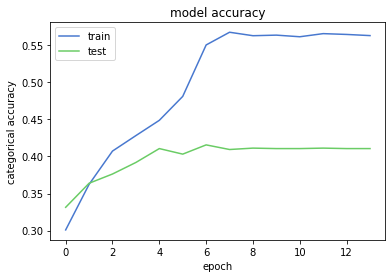

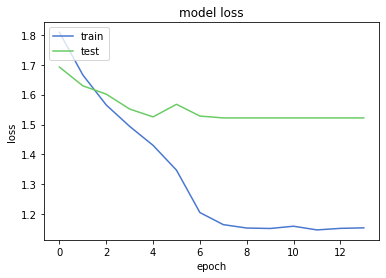

In [126]:
plot_history(model_history_dbert_split)

In [127]:
pred_y_dbert_split = model_dbert_split.predict(X_test_dbert_split_text)

Test Set Accuracy =  0.431
Test Set F-score =  0.342
Test Set Precision =  0.421
Test Set Recall =  0.328
Confusion matrix, without normalization
[[ 73   0   2   7  60   0   0  12  66]
 [  3  17  25   6   5   0   0  16  47]
 [  4   4  89  11   7   0   0  28  65]
 [  1   1   6 121  23   0   0  24  41]
 [ 22   4   4  22 191   0   0  58  69]
 [  0   0   1   0   2   0   0   0   5]
 [  1   1   0   0   1   0   2   0  16]
 [  3   2  15  26  43   0   0 148 105]
 [ 38  16  46  41  67   0   1  68 225]]


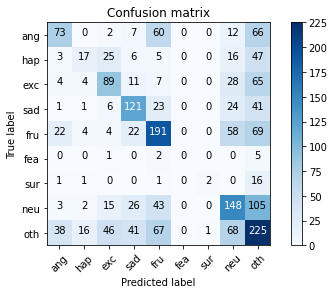

In [128]:
display_results(y_test_split, pred_y_dbert_split)

In [129]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_split = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [130]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 126


In [131]:
from transformers import BertTokenizer, BertConfig, TFBertModel, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [132]:
MODEL_NAME = 'bert-base-uncased'

In [133]:
MAX_LENGTH = 126

tokenizer_bert_split = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [134]:
X_train_bert_split_text = tokenize(X_train_split['transcription'], tokenizer_bert_split)
X_test_bert_split_text = tokenize(X_test_split['transcription'], tokenizer_bert_split)
X_val_bert_split_text = tokenize(X_val_split['transcription'], tokenizer_bert_split)

100%|██████████| 1605/1605 [00:00<00:00, 2053.79it/s]


In [135]:
config_bert_split = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_split = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_split)

input_ids_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_split = BERT_split(input_ids = input_ids_in_bert_split, attention_mask = input_masks_in_bert_split)[0]
X_bert_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_split)
X_bert_split = tf.keras.layers.GlobalMaxPool1D()(X_bert_split)
X_bert_split = tf.keras.layers.Dense(64, activation='relu')(X_bert_split)
X_bert_split = tf.keras.layers.Dropout(0.2)(X_bert_split)
X_bert_split = tf.keras.layers.Dense(9, activation='softmax')(X_bert_split)

model_bert_split = tf.keras.Model(inputs=[input_ids_in_bert_split, input_masks_in_bert_split], outputs = X_bert_split)

for layer in model_bert_split.layers[:3]:
    layer.trainable = False

model_bert_split.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 126)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 126)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 126, 256)     918528      tf_bert_model[0][25]       

In [136]:
curr_dt_time = datetime.now()
local_filepath = output_dir+'/'+'model_init_bert_split_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [137]:
y_val_split.shape

(1605,)

In [138]:
model_bert_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_split = model_bert_split.fit(X_train_bert_split_text, 
                    y_train_split, 
                    epochs = 25,
                    batch_size=32, 
                    validation_data=(X_val_bert_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
201/201 [==============================] - 71s 268ms/step - loss: 1.8100 - sparse_categorical_accuracy: 0.3036 - val_loss: 1.6504 - val_sparse_categorical_accuracy: 0.3707
Epoch 2/25
201/201 [==============================] - 50s 250ms/step - loss: 1.6313 - sparse_categorical_accuracy: 0.3815 - val_loss: 1.5687 - val_sparse_categorical_accuracy: 0.3794
Epoch 3/25
201/201 [==============================] - 50s 250ms/step - loss: 1.5419 - sparse_categorical_accuracy: 0.4041 - val_loss: 1.5550 - val_sparse_categorical_accuracy: 0.3900
Epoch 4/25
201/201 [==============================] - 50s 249ms/step - loss: 1.4687 - sparse_categorical_accuracy: 0.4340 - val_loss: 1.5475 - val_sparse_categorical_accuracy: 0.4019

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/25
201/201 [==============================] - 50s 249ms/step - loss: 1.3396 - sparse_categorical_accuracy: 0.4932 - val_loss: 1.5004 - val_sparse_categorical_accuracy: 0.4156
Epo

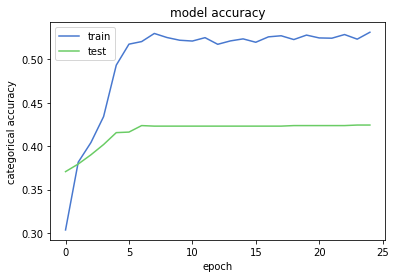

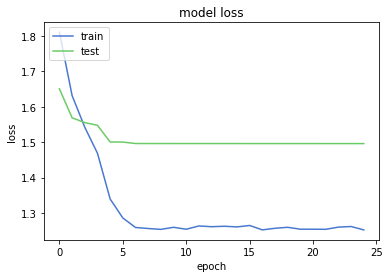

In [139]:
plot_history(model_history_bert_split)

In [140]:
pred_y_bert_split = model_bert_split.predict(X_test_bert_split_text)

Test Set Accuracy =  0.445
Test Set F-score =  0.351
Test Set Precision =  0.424
Test Set Recall =  0.341
Confusion matrix, without normalization
[[ 76   1   4   6  48   0   0  15  70]
 [  3  16  22  12   2   0   0  15  49]
 [  5   8 101  14   2   0   0  27  51]
 [  1   1   6 131  18   0   0  23  37]
 [ 27   1   9  26 178   0   0  67  62]
 [  0   0   0   1   1   0   0   0   6]
 [  1   1   0   0   2   0   2   1  14]
 [  4   2  10  32  37   0   0 162  95]
 [ 33  17  47  43  62   0   1  72 227]]


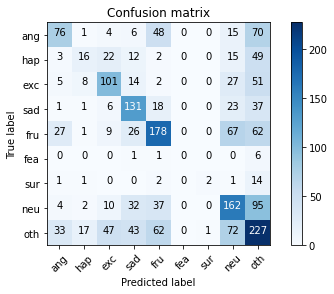

In [141]:
display_results(y_test_split, pred_y_bert_split)

In [142]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [143]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

#Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_split = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_split = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [144]:
max_val = 0
for sent in (X_train_split['transcription'].tolist() + X_test_split['transcription'].tolist() + X_val_split['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_split.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 126


In [145]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig, DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [146]:
MODEL_NAME = 'roberta-base'

In [147]:
MAX_LENGTH = 126

tokenizer_roberta_split = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
        
#     return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [148]:
X_train_roberta_split_text = tokenize(X_train_split['transcription'], tokenizer_roberta_split)
X_test_roberta_split_text = tokenize(X_test_split['transcription'], tokenizer_roberta_split)
X_val_roberta_split_text = tokenize(X_val_split['transcription'], tokenizer_roberta_split)

100%|██████████| 1605/1605 [00:00<00:00, 3393.26it/s]


In [149]:
config_roberta_split = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_split = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_split)

input_ids_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_split = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_split = RoBERTa_split(input_ids = input_ids_in_roberta_split, attention_mask = input_masks_in_roberta_split)[0]
X_roberta_split = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_split)
X_roberta_split = tf.keras.layers.GlobalMaxPool1D()(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(64, activation='relu')(X_roberta_split)
X_roberta_split = tf.keras.layers.Dropout(0.2)(X_roberta_split)
X_roberta_split = tf.keras.layers.Dense(9, activation='softmax')(X_roberta_split)

model_roberta_split = tf.keras.Model(inputs=[input_ids_in_roberta_split, input_masks_in_roberta_split], outputs = X_roberta_split)

for layer in model_roberta_split.layers[:3]:
    layer.trainable = False

model_roberta_split.summary()

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 126)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 126)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model (TFRobertaMode TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 126, 256)     918528      tf_roberta_model[0][25]    

In [150]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_roberta_split_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [151]:
y_val_split.shape

(1605,)

In [152]:
model_roberta_split.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_split = model_roberta_split.fit(X_train_roberta_split_text, 
                    y_train_split, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_roberta_split_text, y_val_split), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
201/201 [==============================] - 71s 268ms/step - loss: 1.9174 - sparse_categorical_accuracy: 0.2413 - val_loss: 1.8113 - val_sparse_categorical_accuracy: 0.3227
Epoch 2/30
201/201 [==============================] - 50s 250ms/step - loss: 1.7726 - sparse_categorical_accuracy: 0.3183 - val_loss: 1.7119 - val_sparse_categorical_accuracy: 0.3252
Epoch 3/30
201/201 [==============================] - 50s 250ms/step - loss: 1.6670 - sparse_categorical_accuracy: 0.3641 - val_loss: 1.6330 - val_sparse_categorical_accuracy: 0.3551
Epoch 4/30
201/201 [==============================] - 50s 249ms/step - loss: 1.5901 - sparse_categorical_accuracy: 0.3966 - val_loss: 1.5904 - val_sparse_categorical_accuracy: 0.3757
Epoch 5/30
201/201 [==============================] - 50s 249ms/step - loss: 1.5194 - sparse_categorical_accuracy: 0.4222 - val_loss: 1.5413 - val_sparse_categorical_accuracy: 0.4062
Epoch 6/30
201/201 [==============================] - 50s 249ms/step - loss: 1.4503 -

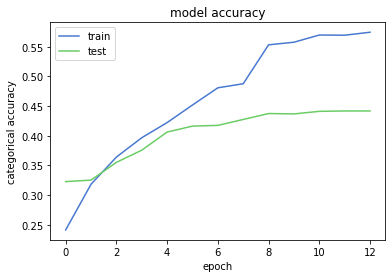

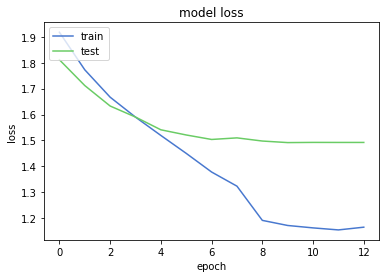

In [153]:
plot_history(model_history_roberta_split)

In [154]:
pred_y_roberta_split = model_roberta_split.predict(X_test_roberta_split_text)

Test Set Accuracy =  0.446
Test Set F-score =  0.347
Test Set Precision =  0.355
Test Set Recall =  0.343
Confusion matrix, without normalization
[[ 84   3   3   5  53   0   0  11  61]
 [  1  34  19  11   2   0   0  16  36]
 [  3  10 100   8   9   0   0  18  60]
 [  4   4   8 118  20   0   0  18  45]
 [ 24   7   7  16 202   0   0  56  58]
 [  0   1   2   1   1   0   0   1   2]
 [  2   1   0   0   1   0   0   2  15]
 [  9   8  12  29  38   0   0 147  99]
 [ 32  29  52  44  79   0   0  55 211]]


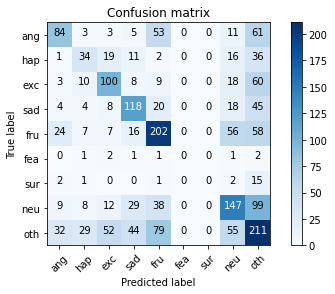

In [155]:
display_results(y_test_split, pred_y_roberta_split)

In [ ]:
#Session based

In [156]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.utils.class_weight import compute_class_weight
import itertools
from IPython.display import display

%matplotlib inline

In [157]:
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [158]:
X_train_session_based_cnn = X_train_session_based.drop(columns=['transcription'])
X_val_session_based_cnn = X_val_session_based.drop(columns=['transcription'])
X_test_session_based_cnn = X_test_session_based.drop(columns=['transcription'])

In [159]:
X_val_session_based_cnn.head()

,sig_mean_1,sig_mean_2,sig_std_1,sig_std_2,rmse_mean_1,rmse_mean_2,rmse_std_1,rmse_std_2,silence_1,silence_2,harmonic_1,harmonic_2,auto_corr_max_1,auto_corr_max_2,auto_corr_std_1,auto_corr_std_2,MCM_new_1,MCM_new_2,MCM_new_3,MCM_new_4,MCM_new_5,MCM_new_6,MCM_new_7,MCM_new_8,MCM_new_9,MCM_new_10,MCM_new_11,MCM_new_12,MCM_new_13,MCM_new_14,MCM_new_15,MCM_new_16,MCM_new_17,MCM_new_18,MCM_new_19,MCM_new_20,MCM_new_21,MCM_new_22,MCM_new_23,MCM_new_24,...,Var_141,Var_142,Var_143,Var_144,Var_145,Var_146,Var_147,Var_148,Var_149,Var_150,Var_151,Var_152,Var_153,Var_154,Var_155,Var_156,Var_157,Var_158,Var_159,Var_160,Var_161,Var_162,Var_163,Var_164,Var_165,Var_166,Var_167,Var_168,Var_169,Var_170,Var_171,Var_172,Var_173,Var_174,Var_175,Var_176,Var_177,Var_178,Var_179,Var_180
5764,-0.438407,-0.362896,-0.421364,-0.383184,-0.443916,-0.370765,-0.360714,-0.379728,0.942490,0.206677,-0.066161,-0.095402,-0.189305,-0.181666,-0.162923,-0.170625,-0.841977,-0.939426,1.780519,-0.225098,-0.177153,0.823709,-0.648833,1.081875,0.183344,-0.643410,2.210747,0.110236,-1.208428,1.377394,0.573001,1.614292,2.657036,0.196273,1.596447,2.365311,-0.409422,-0.070905,0.679232,-0.519507,...,-0.127690,-0.119623,-0.113211,-0.093186,-0.075433,-0.065748,-0.063851,-0.064392,-0.063775,-0.030694,-0.031831,-0.032649,-0.033273,-0.033774,-0.034192,-0.034547,-0.034854,-0.035124,-0.035363,-0.035576,-0.035767,-0.035939,-0.036095,-0.036235,-0.036363,-0.036479,-0.036584,-0.036680,-0.036766,-0.036845,-0.036915,-0.036978,-0.037035,-0.037085,-0.037128,-0.037164,-0.037195,-0.037220,-0.037237,-0.037248
5765,-0.097271,-0.132126,-0.086024,-0.172163,-0.104160,-0.136094,-0.037218,-0.212608,0.942490,0.142096,-0.005975,-0.035375,-0.155616,-0.134293,-0.150331,-0.152914,0.349145,-0.567702,0.895530,-1.092487,-1.487486,0.919459,-0.220808,-0.100778,1.414699,0.001095,0.065063,1.284396,0.462211,-0.341973,-0.436921,0.804497,0.838837,-0.569932,-0.057724,0.772690,0.257847,-0.392790,0.062509,0.407885,...,-0.123509,-0.111505,-0.097998,-0.084228,-0.073797,-0.065477,-0.063798,-0.064385,-0.063639,-0.030401,-0.031516,-0.032320,-0.032933,-0.033426,-0.033837,-0.034187,-0.034490,-0.034756,-0.034992,-0.035203,-0.035391,-0.035561,-0.035715,-0.035854,-0.035981,-0.036095,-0.036200,-0.036295,-0.036380,-0.036458,-0.036528,-0.036590,-0.036647,-0.036697,-0.036739,-0.036775,-0.036806,-0.036830,-0.036847,-0.036858
5766,-0.261170,0.822766,-0.343443,0.708767,-0.275752,0.858940,-0.450940,0.406468,-0.955420,-0.503715,-0.042159,-0.007951,-0.187088,-0.180717,0.017593,0.007154,-0.270428,0.370826,0.047757,0.678757,2.277271,0.407755,-0.150258,0.636882,-1.210417,-0.561268,0.581086,-1.109026,-0.163575,0.410510,-1.819809,-1.034878,0.004985,-1.192958,0.738508,1.293673,1.726539,0.083741,-0.509279,-2.797086,...,-0.120141,-0.112105,-0.109017,-0.089604,-0.071926,-0.065414,-0.063828,-0.064386,-0.063618,-0.030354,-0.031464,-0.032263,-0.032873,-0.033362,-0.033770,-0.034118,-0.034419,-0.034683,-0.034917,-0.035126,-0.035313,-0.035481,-0.035634,-0.035772,-0.035897,-0.036011,-0.036114,-0.036208,-0.036293,-0.036370,-0.036439,-0.036501,-0.036557,-0.036606,-0.036648,-0.036684,-0.036715,-0.036739,-0.036756,-0.036767
5767,0.045902,-0.126036,0.149590,-0.204161,0.034311,-0.142988,0.298032,-0.323601,0.663385,-0.891201,-0.039894,-0.027394,-0.105447,-0.014024,-0.154544,-0.147157,0.365813,-2.256513,1.291531,-0.708095,-0.106519,1.804189,-0.844498,-0.217951,-0.327996,-1.132911,1.971680,0.046024,-2.752495,0.288198,-0.219718,-2.165464,-0.487323,-1.802279,-1.161691,1.121060,-0.005237,0.473410,1.064095,0.638573,...,-0.123519,-0.116136,-0.111563,-0.090921,-0.074172,-0.065368,-0.063830,-0.064392,-0.063779,-0.030700,-0.031835,-0.032650,-0.033272,-0.033771,-0.034186,-0.034539,-0.034844,-0.035113,-0.035350,-0.035561,-0.035751,-0.035921,-0.036076,-0.036215,-0.036342,-0.036457,-0.036561,-0.036656,-0.036741,-0.036819,-0.036889,-0.036952,-0.037008,-0.037058,-0.037100,-0.037136,-0.037167,-0.037191,-0.037208,-0.037219
5768,0.731353,0.364627,0.528009,0.261235,0.727118,0.3717

In [160]:
X_train_session_based_cnn = X_train_session_based_cnn.values.reshape(X_train_session_based_cnn.shape[0],X_train_session_based_cnn.shape[1],1)
X_val_session_based_cnn = X_val_session_based_cnn.values.reshape(X_val_session_based_cnn.shape[0],X_val_session_based_cnn.shape[1],1)
X_test_session_based_cnn = X_test_session_based_cnn.values.reshape(X_test_session_based_cnn.shape[0],X_test_session_based_cnn.shape[1],1)

In [161]:
### Try CNN Models

In [162]:
model_1d_session_based = Sequential()
model_1d_session_based.add(Conv1D(254,5,padding='same',input_shape=(X_train_session_based_cnn[0].shape))) # there are 8 features
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Dropout(0.1))
model_1d_session_based.add(MaxPooling1D(pool_size=(8)))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Conv1D(128,5,padding='same'))
model_1d_session_based.add(Activation('relu'))
model_1d_session_based.add(Flatten())
model_1d_session_based.add(Dense(9))
model_1d_session_based.add(Activation('softmax'))
opt_sb = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [163]:
model_1d_session_based.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 524, 254)          1524      
_________________________________________________________________
activation_7 (Activation)    (None, 524, 254)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 524, 128)          162688    
_________________________________________________________________
dropout_98 (Dropout)         (None, 524, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 65, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 65, 128)           82048     
_________________________________________________________________
activation_8 (Activation)    (None, 65, 128)          

In [164]:
# def plot_history(history_model):
#     # summarize history for accuracy
#     plt.plot(history_model.history['sparse_categorical_accuracy'])
#     plt.plot(history_model.history['val_sparse_categorical_accuracy'])
#     plt.title('model accuracy')
#     plt.ylabel('categorical accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()
#     # summarize history for loss
#     plt.plot(history_model.history['loss'])
#     plt.plot(history_model.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.show()

In [165]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [166]:
from datetime import datetime

In [167]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_1d_session_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

#print(filepath)
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.00000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [168]:
model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])

In [169]:
model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=32,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
181/181 [==============================] - 3s 13ms/step - loss: 1.8095 - sparse_categorical_accuracy: 0.2916 - val_loss: 1.8522 - val_sparse_categorical_accuracy: 0.3186
Epoch 2/30
181/181 [==============================] - 2s 11ms/step - loss: 1.6951 - sparse_categorical_accuracy: 0.3465 - val_loss: 1.7836 - val_sparse_categorical_accuracy: 0.2834
Epoch 3/30
181/181 [==============================] - 2s 11ms/step - loss: 1.6259 - sparse_categorical_accuracy: 0.3720 - val_loss: 1.8226 - val_sparse_categorical_accuracy: 0.3167

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
181/181 [==============================] - 2s 11ms/step - loss: 1.5206 - sparse_categorical_accuracy: 0.4113 - val_loss: 1.7562 - val_sparse_categorical_accuracy: 0.3062
Epoch 5/30
181/181 [==============================] - 2s 11ms/step - loss: 1.4878 - sparse_categorical_accuracy: 0.4264 - val_loss: 1.7772 - val_sparse_categorical_accuracy: 0.3096

Epoch 00005:

In [170]:
model_1d_session_based_hist.history

{'loss': [1.8094613552093506,
  1.6950817108154297,
  1.6259444952011108,
  1.5206356048583984,
  1.4878009557724,
  1.4644269943237305,
  1.4595922231674194],
 'lr': [0.001,
  0.001,
  0.001,
  0.000100000005,
  0.000100000005,
  1.0000001e-05,
  1.0000001e-06],
 'sparse_categorical_accuracy': [0.29163774847984314,
  0.3464607894420624,
  0.3719639182090759,
  0.41134628653526306,
  0.42643997073173523,
  0.43667590618133545,
  0.43719640374183655],
 'val_loss': [1.8522002696990967,
  1.7835816144943237,
  1.8225712776184082,
  1.756217360496521,
  1.7771592140197754,
  1.7725515365600586,
  1.7726870775222778],
 'val_sparse_categorical_accuracy': [0.31859248876571655,
  0.2834046483039856,
  0.31669044494628906,
  0.30622920393943787,
  0.3095577657222748,
  0.3095577657222748,
  0.3095577657222748]}

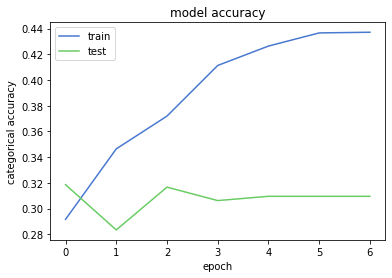

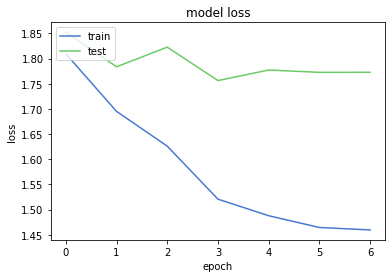

In [171]:
plot_history(model_1d_session_based_hist)

In [172]:
pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [173]:
pred_y_session_based.shape

(2164, 9)

In [174]:
#pred_y_split = np.argmax(pred_y_split,axis=1)

In [175]:
#pred_y_split.shape

In [176]:
#pred_y_split.shape

Test Set Accuracy =  0.294
Test Set F-score =  0.207
Test Set Precision =  0.250
Test Set Recall =  0.208
Confusion matrix, without normalization
[[ 45   1  10   3  62   0   0  15  32]
 [  0   1  22  25  16   0   0  33  46]
 [  6   1  47   5  53   0   0  47 140]
 [  1   0   0 116  10   0   0  29  89]
 [ 13   2  23  15 106   0   0  63 157]
 [  0   0   1   0   1   0   0   1   7]
 [  0   1   1   4   1   0   0   2   9]
 [  0   0  13  63  49   0   0  93 166]
 [ 12   0  21  88  83   0   0  86 228]]


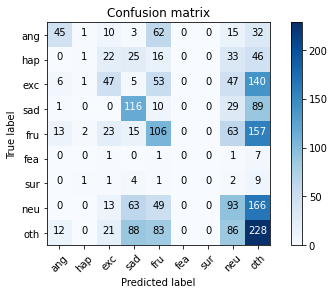

In [177]:
display_results(y_test_session_based, pred_y_session_based)

In [178]:
# model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])
# model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=128,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [179]:
#plot_history(model_1d_session_based_hist)

In [180]:
#pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [181]:
#display_results(y_test_session_based, pred_y_session_based)

In [182]:
# model_1d_session_based.compile(loss='sparse_categorical_crossentropy',optimizer=opt_sb, metrics=['sparse_categorical_accuracy'])
# model_1d_session_based_hist = model_1d_session_based.fit(X_train_session_based_cnn, y_train_session_based, batch_size=1024,epochs=30, validation_data=(X_val_session_based_cnn,y_val_session_based),callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [183]:
#plot_history(model_1d_session_based_hist)

In [184]:
#pred_y_session_based = model_1d_session_based.predict(X_test_session_based_cnn)

In [185]:
#display_results(y_test_session_based, pred_y_session_based)

In [186]:
#from sklearn.metrics import balanced_accuracy_score

In [187]:
#balanced_accuracy_score(y_test_split, np.argmax(pred_y_split,axis=1))

In [188]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [189]:
from datetime import datetime

In [190]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' +'model_init_2d_session_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=False)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [191]:
X_train_session_based_cnn_2d = np.expand_dims(X_train_session_based_cnn, -1)
X_val_session_based_cnn_2d = np.expand_dims(X_val_session_based_cnn, -1)
X_test_session_based_cnn_2d = np.expand_dims(X_test_session_based_cnn, -1)

In [192]:
X_train_session_based_cnn.shape

(5764, 524, 1)

In [193]:
#ip = tf.keras.layers.Input(shape=X_train_split_cnn[0].shape)

model_session_based_2d = Sequential()
model_session_based_2d.add(Conv2D(256,5,padding='same',input_shape=(X_train_session_based_cnn.shape[1],1,1))) #(x_train_mfcc_cnn_2d[0].shape))) # there are 8 features
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Dropout(0.1))
#model_mfcc_2d.add(MaxPooling2D(pool_size=(2)))
model_session_based_2d.add(Conv2D(128,5,padding='same'))
model_session_based_2d.add(Activation('relu'))
model_session_based_2d.add(Flatten())
model_session_based_2d.add(Dense(9))
model_session_based_2d.add(Activation('softmax'))
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-4)

In [194]:
model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['sparse_categorical_accuracy'])
model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
              y_train_session_based,
              epochs=30,
              batch_size=32,
              validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
              callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
181/181 [==============================] - 7s 36ms/step - loss: 1.7699 - sparse_categorical_accuracy: 0.3105 - val_loss: 1.7849 - val_sparse_categorical_accuracy: 0.2891
Epoch 2/30
181/181 [==============================] - 6s 34ms/step - loss: 1.6203 - sparse_categorical_accuracy: 0.3732 - val_loss: 1.7758 - val_sparse_categorical_accuracy: 0.2853

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/30
181/181 [==============================] - 6s 35ms/step - loss: 1.4586 - sparse_categorical_accuracy: 0.4412 - val_loss: 1.8310 - val_sparse_categorical_accuracy: 0.2863

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 4/30
181/181 [==============================] - 6s 34ms/step - loss: 1.4116 - sparse_categorical_accuracy: 0.4571 - val_loss: 1.8339 - val_sparse_categorical_accuracy: 0.2829

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 5/30
181/181 [==========

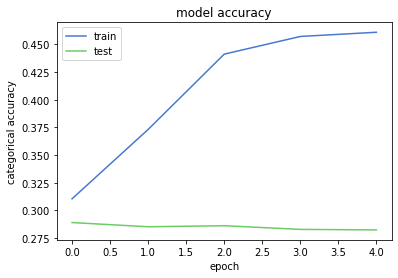

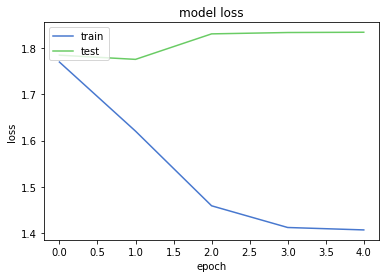

In [195]:
plot_history(model_history_session_based_2d)

In [196]:
pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

Test Set Accuracy =  0.300
Test Set F-score =  0.205
Test Set Precision =  0.254
Test Set Recall =  0.216
Confusion matrix, without normalization
[[ 57   2   2   1  34   0   0  20  52]
 [  4   6   3  22   9   0   0  61  38]
 [  6   7  11   3  49   0   0  99 124]
 [  0   0   0 114   7   0   0  58  66]
 [ 24   5   5  18  64   0   0 133 130]
 [  0   0   0   1   1   0   0   3   5]
 [  0   1   0   4   1   0   0   3   9]
 [  2   5   2  53  18   0   0 179 125]
 [ 19   2   7  87  50   0   0 134 219]]


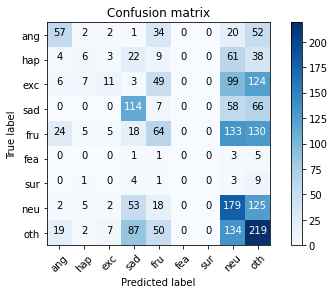

In [197]:
display_results(y_test_session_based, pred_y_2d_session_based)

In [198]:
# model_session_based_2d.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['sparse_categorical_accuracy'])
# model_history_session_based_2d = model_session_based_2d.fit(X_train_session_based_cnn_2d, 
#               y_train_session_based,
#               epochs=30,
#               batch_size=128,
#               validation_data=(X_val_session_based_cnn_2d, y_val_session_based),
#               callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [199]:
#plot_history(model_history_session_based_2d)

In [200]:
#pred_y_2d_session_based = model_session_based_2d.predict(X_test_session_based_cnn_2d)

In [201]:
#display_results(y_test_session_based, pred_y_2d_session_based)

In [202]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [203]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [204]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 126


In [205]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [206]:
MODEL_NAME = 'distilbert-base-uncased'

In [207]:
MAX_LENGTH = 126

tokenizer_dbert_sb = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [208]:
X_train_dbert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_dbert_sb)
X_test_dbert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_dbert_sb)
X_val_dbert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_dbert_sb)

100%|██████████| 2103/2103 [00:01<00:00, 1925.79it/s]


In [209]:
config_dbert_sb = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb)

input_ids_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb = DistilBERT_sb(input_ids = input_ids_in_dbert_sb, attention_mask = input_masks_in_dbert_sb)[0]
X_dbert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb)
X_dbert_sb = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dropout(0.2)(X_dbert_sb)
X_dbert_sb = tf.keras.layers.Dense(9, activation='softmax')(X_dbert_sb)

model_dbert_session_based = tf.keras.Model(inputs=[input_ids_in_dbert_sb, input_masks_in_dbert_sb], outputs = X_dbert_sb)

for layer in model_dbert_session_based.layers[:3]:
    layer.trainable = False

model_dbert_session_based.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 126)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 126)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_1 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 126, 256)     918528      tf_distil_bert_model_1[0][1

In [210]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_dbert_sb_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'

model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [211]:
y_val_session_based.shape

(2103,)

In [212]:
model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
                    y_train_session_based, 
                    epochs = 25,
                    batch_size=32, 
                    validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
181/181 [==============================] - 39s 159ms/step - loss: 1.8537 - sparse_categorical_accuracy: 0.2741 - val_loss: 1.7065 - val_sparse_categorical_accuracy: 0.3362
Epoch 2/25
181/181 [==============================] - 27s 147ms/step - loss: 1.7065 - sparse_categorical_accuracy: 0.3473 - val_loss: 1.6668 - val_sparse_categorical_accuracy: 0.3623
Epoch 3/25
181/181 [==============================] - 27s 147ms/step - loss: 1.6187 - sparse_categorical_accuracy: 0.3763 - val_loss: 1.6486 - val_sparse_categorical_accuracy: 0.3642
Epoch 4/25
181/181 [==============================] - 27s 147ms/step - loss: 1.5209 - sparse_categorical_accuracy: 0.4193 - val_loss: 1.6973 - val_sparse_categorical_accuracy: 0.3509

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/25
181/181 [==============================] - 26s 147ms/step - loss: 1.3946 - sparse_categorical_accuracy: 0.4683 - val_loss: 1.5906 - val_sparse_categorical_accuracy: 0.3795
Epo

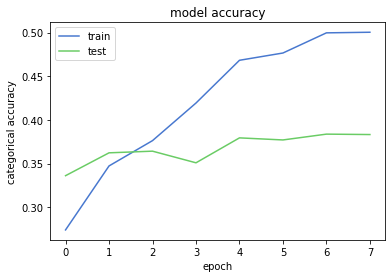

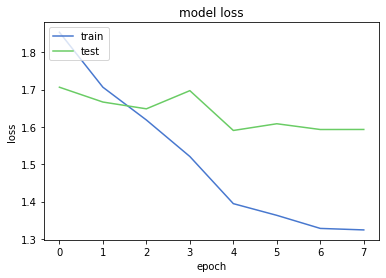

In [213]:
plot_history(model_history_dbert_session_based)

In [214]:
pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

Test Set Accuracy =  0.406
Test Set F-score =  0.298
Test Set Precision =  0.318
Test Set Recall =  0.297
Confusion matrix, without normalization
[[ 61   0   3   7  34   0   0  15  48]
 [  0  14  26  18   8   0   0  23  54]
 [  2  15  92  21  15   0   0  46 108]
 [  3   2   6 134  44   0   0  26  30]
 [ 35   2   6  31 171   0   0  69  65]
 [  0   0   2   3   1   0   0   0   4]
 [  3   0   1   0   0   0   0   2  12]
 [  4   2  12  32  50   0   0 182 102]
 [ 36  15  22  60  72   0   0  88 225]]


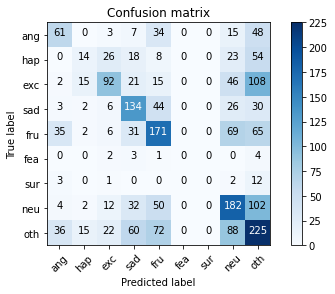

In [215]:
display_results(y_test_session_based,pred_y_dbert_session_based)

In [216]:
# model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 25,
#                     batch_size=256, 
#                     validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [217]:
#plot_history(model_history_dbert_session_based)

In [218]:
#pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

In [219]:
#display_results(y_test_session_based,pred_y_dbert_session_based)

In [220]:
# model_dbert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_dbert_session_based = model_dbert_session_based.fit(X_train_dbert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 25,
#                     batch_size=256, 
#                     validation_data=(X_val_dbert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [221]:
#plot_history(model_history_dbert_session_based)

In [222]:
#pred_y_dbert_session_based = model_dbert_session_based.predict(X_test_dbert_session_based_text)

In [223]:
#display_results(y_test_session_based,pred_y_dbert_session_based)

In [224]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [225]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 126


In [226]:
from transformers import BertTokenizer, TFBertModel, BertConfig

In [227]:
MODEL_NAME = 'bert-base-uncased'

In [228]:
MAX_LENGTH = 126

tokenizer_bert_sb = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [229]:
X_train_bert_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_bert_sb)
X_test_bert_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_bert_sb)
X_val_bert_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_bert_sb)

100%|██████████| 2103/2103 [00:01<00:00, 2057.20it/s]


In [230]:
config_bert_sb = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb)

input_ids_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb = BERT_sb(input_ids = input_ids_in_bert_sb, attention_mask = input_masks_in_bert_sb)[0]
X_bert_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb)
X_bert_sb = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb)
X_bert_sb = tf.keras.layers.Dropout(0.2)(X_bert_sb)
X_bert_sb = tf.keras.layers.Dense(9, activation='softmax')(X_bert_sb)

model_bert_session_based = tf.keras.Model(inputs=[input_ids_in_bert_sb, input_masks_in_bert_sb], outputs = X_bert_sb)

for layer in model_bert_session_based.layers[:3]:
    layer.trainable = False

model_bert_session_based.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 126)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 126)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 126, 256)     918528      tf_bert_model_1[0][25]     

In [231]:
curr_dt_time = datetime.now()
local_filepath = output_dir + '/' + 'model_init_bert_sb_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [232]:
y_val_session_based.shape

(2103,)

In [233]:
model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_bert_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
181/181 [==============================] - 69s 288ms/step - loss: 1.8064 - sparse_categorical_accuracy: 0.2993 - val_loss: 1.6634 - val_sparse_categorical_accuracy: 0.3524
Epoch 2/30
181/181 [==============================] - 48s 268ms/step - loss: 1.6463 - sparse_categorical_accuracy: 0.3669 - val_loss: 1.6404 - val_sparse_categorical_accuracy: 0.3533
Epoch 3/30
181/181 [==============================] - 48s 268ms/step - loss: 1.5571 - sparse_categorical_accuracy: 0.4072 - val_loss: 1.6660 - val_sparse_categorical_accuracy: 0.3533

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/30
181/181 [==============================] - 49s 269ms/step - loss: 1.4081 - sparse_categorical_accuracy: 0.4724 - val_loss: 1.5962 - val_sparse_categorical_accuracy: 0.3742
Epoch 5/30
181/181 [==============================] - 48s 268ms/step - loss: 1.3772 - sparse_categorical_accuracy: 0.4814 - val_loss: 1.5682 - val_sparse_categorical_accuracy: 0.3966
Epo

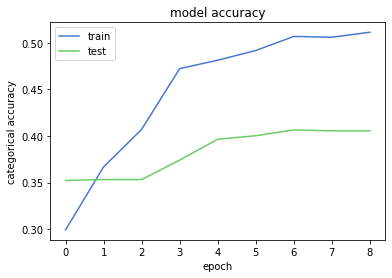

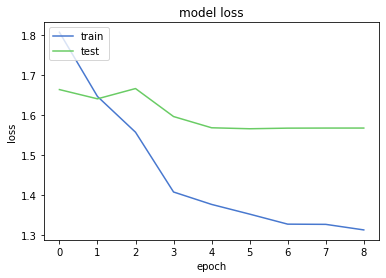

In [234]:
plot_history(model_history_bert_session_based)

In [235]:
# model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=256, 
#                     validation_data=(X_val_bert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

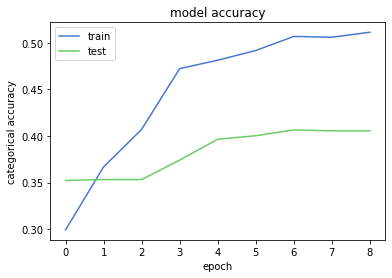

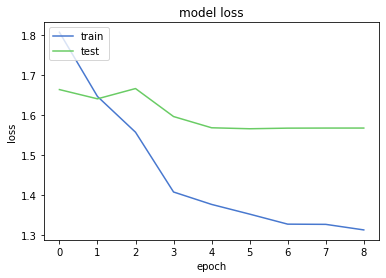

In [236]:
plot_history(model_history_bert_session_based)

In [237]:
pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

Test Set Accuracy =  0.414
Test Set F-score =  0.306
Test Set Precision =  0.324
Test Set Recall =  0.306
Confusion matrix, without normalization
[[ 62   0   1   7  36   0   0  12  50]
 [  2  15  35  10   5   0   0  37  39]
 [  3  15 107  20  12   0   0  49  93]
 [  0   1   3 137  41   0   0  31  32]
 [ 27   2   5  31 170   0   0  69  75]
 [  1   0   1   1   1   0   0   1   5]
 [  3   1   1   0   1   0   0   0  12]
 [  9   3  12  31  49   0   0 195  85]
 [ 41  19  19  54  81   0   0  95 209]]


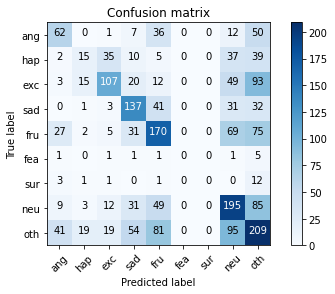

In [238]:
display_results(y_test_session_based,pred_y_bert_session_based)

In [239]:
#pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

In [240]:
#display_results(y_test_session_based,pred_y_bert_session_based)

In [241]:
# model_bert_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_bert_session_based = model_bert_session_based.fit(X_train_bert_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=256, 
#                     validation_data=(X_val_bert_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

In [242]:
#plot_history(model_history_bert_session_based)

In [243]:
#pred_y_bert_session_based = model_bert_session_based.predict(X_test_bert_session_based_text)

In [244]:
#display_results(y_test_session_based,pred_y_bert_session_based)

In [245]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want RoBERTa instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.RobertaModel, ppb.RobertaTokenizer, 'roberta-base')

# Load pretrained model/tokenizer
tokenizer_roberta_sb = tokenizer_class.from_pretrained(pretrained_weights)
model_roberta_session_based = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [246]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_roberta_sb.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 126


In [247]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig

In [248]:
MODEL_NAME = 'roberta-base'

In [249]:
MAX_LENGTH = 126

tokenizer_robert_sb = RobertaTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [250]:
X_train_roberta_session_based_text = tokenize(X_train_session_based['transcription'], tokenizer_roberta_sb)
X_test_roberta_session_based_text = tokenize(X_test_session_based['transcription'], tokenizer_roberta_sb)
X_val_roberta_session_based_text = tokenize(X_val_session_based['transcription'], tokenizer_roberta_sb)

100%|██████████| 2103/2103 [00:00<00:00, 3626.90it/s]


In [251]:
config_roberta_sb = RobertaConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
RoBERTa_sb = TFRobertaModel.from_pretrained(MODEL_NAME, config=config_roberta_sb)

input_ids_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_roberta_sb = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_roberta_sb = RoBERTa_sb(input_ids = input_ids_in_roberta_sb, attention_mask = input_masks_in_roberta_sb)[0]
X_roberta_sb = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_roberta_sb)
X_roberta_sb = tf.keras.layers.GlobalMaxPool1D()(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(64, activation='relu')(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dropout(0.2)(X_roberta_sb)
X_roberta_sb = tf.keras.layers.Dense(9, activation='softmax')(X_roberta_sb)

model_roberta_session_based = tf.keras.Model(inputs=[input_ids_in_roberta_sb, input_masks_in_roberta_sb], outputs = X_roberta_sb)

for layer in model_roberta_session_based.layers[:3]:
    layer.trainable = False

model_roberta_session_based.summary()

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 126)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 126)]        0                                            
__________________________________________________________________________________________________
tf_roberta_model_1 (TFRobertaMo TFBaseModelOutputWit 124645632   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 126, 256)     918528      tf_roberta_model_1[0][25]  

In [252]:
curr_dt_time = datetime.now()
local_filename = output_dir + '/' + 'model_init_roberta_sb_all_labels' + '/'
if not os.path.exists(local_filepath):
    os.mkdir(local_filepath)
local_filename = local_filepath + 'model-{epoch:05d}-{sparse_categorical_accuracy:.5f}-{loss:.5f}-{val_sparse_categorical_accuracy:.5f}-{val_loss:.5f}'+ str(curr_dt_time).replace(' ','').replace(':','_')+'.h5'

#filepath = output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5'
model_checkpoint = ModelCheckpoint(filepath=local_filename, #output_dir+'/' + local_file_name + 'model-{epoch:05d}-{loss:.5f}-{val_loss:.5f}.h5',
                                  save_weights_only=True)

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=False, # Don't Restore the best weights
                               verbose=1) 

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # Look at validation loss
                              min_lr=0.0000001, # Lower bound of learning rate
                              patience=1, # Reduce after 1 with little change
                              mode='min', # Stop when quantity has stopped decreasing
                              factor=0.1, # Reduce by a factor of 1/10
                              min_delta=0.01, # Minimumn change needed
                              verbose=1)

In [253]:
y_val_session_based.shape

(2103,)

In [254]:
model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
                    y_train_session_based, 
                    epochs = 30,
                    batch_size=32, 
                    validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
                    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/30
181/181 [==============================] - 79s 338ms/step - loss: 1.9424 - sparse_categorical_accuracy: 0.2427 - val_loss: 1.8630 - val_sparse_categorical_accuracy: 0.2905
Epoch 2/30
181/181 [==============================] - 49s 270ms/step - loss: 1.7800 - sparse_categorical_accuracy: 0.3145 - val_loss: 1.7498 - val_sparse_categorical_accuracy: 0.3129
Epoch 3/30
181/181 [==============================] - 49s 269ms/step - loss: 1.6613 - sparse_categorical_accuracy: 0.3636 - val_loss: 1.7165 - val_sparse_categorical_accuracy: 0.3205
Epoch 4/30
181/181 [==============================] - 49s 268ms/step - loss: 1.5708 - sparse_categorical_accuracy: 0.4110 - val_loss: 1.6119 - val_sparse_categorical_accuracy: 0.3733
Epoch 5/30
181/181 [==============================] - 49s 269ms/step - loss: 1.4990 - sparse_categorical_accuracy: 0.4301 - val_loss: 1.6655 - val_sparse_categorical_accuracy: 0.3638

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epo

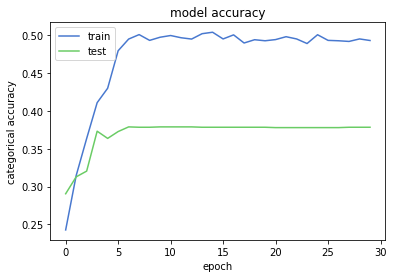

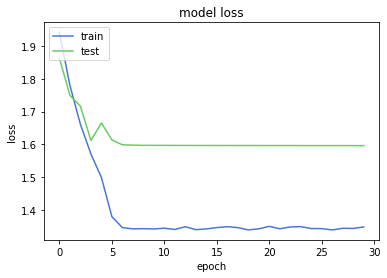

In [255]:
plot_history(model_history_roberta_session_based)

In [256]:
# model_roberta_session_based.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

# model_history_roberta_session_based = model_roberta_session_based.fit(X_train_roberta_session_based_text, 
#                     y_train_session_based, 
#                     epochs = 30,
#                     batch_size=256, 
#                     validation_data=(X_val_roberta_session_based_text, y_val_session_based), 
#                     callbacks=[model_checkpoint, early_stopping, reduce_lr])

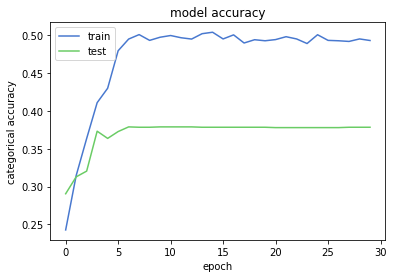

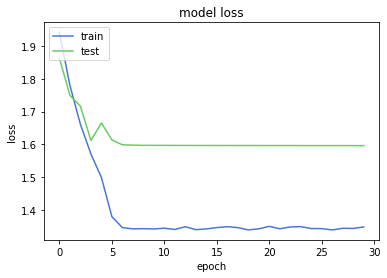

In [257]:
plot_history(model_history_roberta_session_based)

In [258]:
pred_y_roberta_session_based = model_roberta_session_based.predict(X_test_roberta_session_based_text)

Test Set Accuracy =  0.405
Test Set F-score =  0.306
Test Set Precision =  0.312
Test Set Recall =  0.309
Confusion matrix, without normalization
[[ 79   0   2   6  33   0   0  12  36]
 [  3  19  32  15  11   0   0  29  34]
 [  7  22 112  19  16   0   0  34  89]
 [  1   7   9 130  43   0   0  24  31]
 [ 38   0  11  31 175   0   0  62  62]
 [  1   0   1   2   0   0   0   1   5]
 [  3   0   1   2   0   0   0   0  12]
 [  5   9  12  32  73   0   0 174  79]
 [ 46  26  22  61  94   0   0  82 187]]


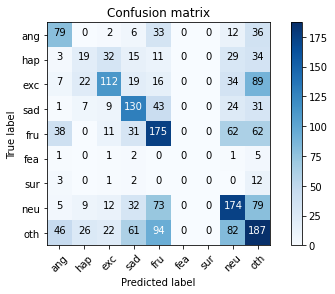

In [259]:
display_results(y_test_session_based,pred_y_roberta_session_based)

In [ ]:
### Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
import joblib

In [ ]:
model_1d_name = output_dir+'/model_init_1d_session_init_end/'+'model-00004-0.54413-1.12441-0.44473-1.426522021-10-2315_14_46.093026.h5'
model_2d_name = output_dir +'/model_init_2d_session_init_end/' + 'model-00002-0.53745-1.12375-0.43433-1.357342021-10-2316_26_39.984024.h5'
model_rf_name = output_dir + '/model_rf_session_init_end/' + 'model_rf_0.392_2021-10-2318_10_36.162898' + '.joblib'

In [ ]:
model_1d_ens = keras.models.load_model(model_1d_name)
model_2d_ens = keras.models.load_model(model_2d_name)
model_rf_ens = joblib.load(model_rf_name)

In [ ]:
y_ens_1d_pred = model_1d_ens.predict(X_test_session_based_cnn)

In [ ]:
y_ens_2d_pred = model_2d_ens.predict(X_test_session_based_cnn_2d)

In [ ]:
y_ens_rf_pred = model_rf_ens.predict_proba(X_test_session_based_rf.drop(columns='transcription'))

In [ ]:
y_ens_rf_pred.shape

(1646, 6)

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_dbert_sb_ens = tokenizer_class.from_pretrained(pretrained_weights)
model_dbert_session_based_ens = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_dbert_sb_ens.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel, DistilBertConfig

In [ ]:
MODEL_NAME = 'distilbert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_dbert_sb_ens = DistilBertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [], [], []
    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, 
                                       add_special_tokens=True, 
                                       max_length=MAX_LENGTH, 
                                       pad_to_max_length=True, 
                                       return_attention_mask=True, 
                                       return_token_type_ids=True, 
                                       truncation=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
       
    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
config_dbert_sb_ens = DistilBertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
DistilBERT_sb_ens = TFDistilBertModel.from_pretrained(MODEL_NAME, config=config_dbert_sb_ens)

input_ids_in_dbert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_dbert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_dbert_sb_ens = DistilBERT_sb_ens(input_ids = input_ids_in_dbert_sb_ens, attention_mask = input_masks_in_dbert_sb_ens)[0]
X_dbert_sb_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.GlobalMaxPool1D()(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dense(64, activation='relu')(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dropout(0.2)(X_dbert_sb_ens)
X_dbert_sb_ens = tf.keras.layers.Dense(6, activation='softmax')(X_dbert_sb_ens)

model_dbert_session_based_ens = tf.keras.Model(inputs=[input_ids_in_dbert_sb_ens, input_masks_in_dbert_sb_ens], outputs = X_dbert_sb_ens)

#for layer in model_dbert_session_based.layers[:3]:
#    layer.trainable = False

model_dbert_session_based_ens.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model_2 (TFDisti TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_4 (Bidirectional) (None, 114, 256)     918528      tf_distil_bert_model_2[0][1

In [ ]:
model_dbert_session_based_ens.load_weights(output_dir+'/model_init_dbert_sb_init_end/'+'model-00002-0.65315-0.88066-0.55137-1.115182021-10-2316_16_02.040413.h5')

In [ ]:
y_ens_dbert_session_based_pred = model_dbert_session_based_ens.predict(X_test_dbert_session_based_text)

In [ ]:
# For DistilBERT:
#model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer_bert_sb_ens = tokenizer_class.from_pretrained(pretrained_weights)
model_bert_session_based_ens = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
max_val = 0
for sent in (X_train_session_based['transcription'].tolist() + X_test_session_based['transcription'].tolist() + X_val_session_based['transcription'].tolist()):
    try:
        sent_tok_len = len(tokenizer_bert_sb_ens.tokenize(sent))
        max_val = sent_tok_len if (sent_tok_len > max_val) else max_val
    except:
        pass
    
print(f"The maximum amount of tokens in the dataset is {max_val}")

The maximum amount of tokens in the dataset is 114


In [ ]:
from transformers import BertTokenizer, TFBertModel, BertConfig

In [ ]:
MODEL_NAME = 'bert-base-uncased'

In [ ]:
MAX_LENGTH = 114

tokenizer_bert_sb_ens = BertTokenizer.from_pretrained(MODEL_NAME,  
                                                add_special_tokens=True,
                                                max_length=MAX_LENGTH, 
                                                pad_to_max_length=True)

# def tokenize(sentences, tokenizer):
#     input_ids, input_masks, input_segments = [], [], []
#     for sentence in tqdm(sentences):
#         inputs = tokenizer.encode_plus(sentence, 
#                                        add_special_tokens=True, 
#                                        max_length=MAX_LENGTH, 
#                                        pad_to_max_length=True, 
#                                        return_attention_mask=True, 
#                                        return_token_type_ids=True, 
#                                        truncation=True)
#         input_ids.append(inputs['input_ids'])
#         input_masks.append(inputs['attention_mask'])
#         input_segments.append(inputs['token_type_ids'])        
#        
#    return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32')

In [ ]:
config_bert_sb_ens = BertConfig.from_pretrained(MODEL_NAME, output_hidden_states=True, output_attentions=True)
BERT_sb_ens = TFBertModel.from_pretrained(MODEL_NAME, config=config_bert_sb_ens)

input_ids_in_bert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='input_token', dtype='int32')
input_masks_in_bert_sb_ens = tf.keras.layers.Input(shape=(MAX_LENGTH,), name='masked_token', dtype='int32') 

embedding_layer_bert_sb_ens = BERT_sb(input_ids = input_ids_in_bert_sb_ens, attention_mask = input_masks_in_bert_sb_ens)[0]
X_bert_sb_ens = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(embedding_layer_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.GlobalMaxPool1D()(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dense(64, activation='relu')(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dropout(0.2)(X_bert_sb_ens)
X_bert_sb_ens = tf.keras.layers.Dense(6, activation='softmax')(X_bert_sb_ens)

model_bert_session_based_ens = tf.keras.Model(inputs=[input_ids_in_bert_sb_ens, input_masks_in_bert_sb_ens], outputs = X_bert_sb_ens)

#for layer in model_bert_session_based.layers[:3]:
#    layer.trainable = False

model_bert_session_based_ens.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 114)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 114)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 114, 256)     918528      tf_bert_model[1][25]       

In [ ]:
model_bert_session_based_ens.load_weights(output_dir+'/model_init_bert_sb_init_end/model-00007-0.57041-1.07485-0.48700-1.181942021-10-2315_36_45.578013'+'.h5')

ValueError: ignored

In [ ]:
y_ens_1d_pred.shape

(1646, 6)

In [ ]:
y_ens_all_pred = array([y_ens_rf_pred, y_ens_1d_pred,y_ens_2d_pred,y_ens_dbert_session_based_pred])

In [ ]:
y_ens_summed_pred = tensordot(y_ens_all_pred, [1,1,3,6], axes=((0),(0)))

In [ ]:
y_ens_summed_pred.shape

(1646, 6)

In [ ]:
display_results(y_test_session_based,y_ens_summed_pred)

Test Set Accuracy =  0.610
Test Set F-score =  0.394
Test Set Precision =  0.416
Test Set Recall =  0.386
Confusion matrix, without normalization
[[ 85  11  61   0   0  11]
 [ 13 259 119   0   0  51]
 [ 35  46 492   0   0  51]
 [  0   3   6   0   0   1]
 [  2   4  11   0   0   1]
 [  6  31 179   0   0 168]]


In [ ]:
model_combined_split_db_1 = VotingClassifier(estimators=[('m1ds', model_1d_ens), ('m2ds', model_2d_ens)], voting='soft')

In [ ]:
model_combined_split_db_1.predict_proba(X_train_split)